In [2]:
import numpy as np
#from scipy import optimize
#import numpy_financial as npf
import pandas as pd
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

In [3]:
'''
start_time = datetime.today()
start_date = start_time.strftime("%m/%Y")
print("Today's Date: ", start_date)

end_time = start_time + relativedelta(months=360)
end_date = end_time.strftime("%m/%Y")
print("End of Study Date: ", end_date)
'''
def getDateTime():
    start_time = datetime.today()
    start_date = start_time.strftime("%m/%Y")

    end_time = start_time + relativedelta(months=360)
    end_date = end_time.strftime("%m/%Y")
    return start_date,end_date

start_date,end_date = getDateTime()
print("Today's Date: ", start_date)
print("End of Study Date: ", end_date)

Today's Date:  01/2025
End of Study Date:  01/2055


## Purchase Assumptions:
Input variables for house purchase assumptions. The variables **purchase_price** and **hold_period** are mandatory inputs...

In [4]:
'''
purchase_price = 500000 #dollars
hold_period = 5 #hold period in years
hold_period_m = hold_period * 12 #hold period in months
'''

pa_params = {
    "purchase_price": 500000,
    "hold_period": 5
}

class PurchaseAssumptions:
    def __init__(self,purchase_price,hold_period):
        self.purchase_price = purchase_price
        self.hold_period = hold_period
        self.hold_period_m = self.hold_period * 12

    def __str__(self):
        for key,value in vars(self).items():
            print(f"{key}: {value}")

PA = PurchaseAssumptions(**pa_params)
PA.__str__()

print("\nPurchase Price: ${}".format(PA.purchase_price))
print("Hold Period: {} years ({} month)".format(PA.hold_period,PA.hold_period_m))

purchase_price: 500000
hold_period: 5
hold_period_m: 60

Purchase Price: $500000
Hold Period: 5 years (60 month)


## Rent Assumptions:
Input variables for renting assumptions. The variables **apartment_rent**, **parking_rent** and **renters_insurance** are mandatory, toggle buttons on optional inclusions...

In [5]:
'''
apartment_rent = 3000 #monthly rent
parking_rent = 300 #monthly parking
renters_insurance = 600 #renters insurance per year
monthly_rent = apartment_rent + parking_rent #total monthly rent charges
'''

ra_params = {
    "apartment_rent": 3000,
    "parking_rent": 300,
    "renters_insurance": 600,
}

class RentAssumptions:
    def __init__(self,apartment_rent,parking_rent,renters_insurance):
        self.apartment_rent = apartment_rent
        self.parking_rent = parking_rent
        self.renters_insurance = renters_insurance
        self.monthly_rent = self.apartment_rent + self.parking_rent

    def __str__(self):
        for key,value in vars(self).items():
            print(f"{key}: {value}")

RA = RentAssumptions(**ra_params)
RA.__str__()

print(f"\nMonthly Rent: ${RA.monthly_rent}/month\nRenters Insurance: ${RA.renters_insurance}/year")

apartment_rent: 3000
parking_rent: 300
renters_insurance: 600
monthly_rent: 3300

Monthly Rent: $3300/month
Renters Insurance: $600/year


## General Assumptions:
Input variables for general assumptions, whose appearance can be toggled on/off...most all these should be general assumptions...

In [6]:
'''
rate_capital_gains = 20 #capital gains rate (%)
rate_federal_tax = 35 #federal tax rate (%)
bool_federal = True #true when incorporating federal tax
salt_limit = 10000 #SALT limit
bool_salt = True #true when incorporating SALT limit
rent_growth = 3 #rent growth / year
home_appreciation = 3 #home price appreciation / year
ret_inflation = 3 #RET inflation, clarify what this is...
other_inflation = 3 #other, clarify what this includes...
'''

ga_params = {
    "rate_capital_gains": 20,
    "rate_federal_tax": 35,
    "bool_federal": True,
    "salt_limit": 10000,
    "bool_salt": True,
    "rent_growth": 3,
    "home_appreciation": 3,
    "ret_inflation": 3,
    "other_inflation": 3
}

class GeneralAssumptions:
    def __init__(self,rate_capital_gains,rate_federal_tax,bool_federal,salt_limit,bool_salt,rent_growth,home_appreciation,ret_inflation,other_inflation):
        self.rate_capital_gains = rate_capital_gains
        self.rate_federal_tax = rate_federal_tax
        self.bool_federal = bool_federal
        self.salt_limit = salt_limit
        self.bool_salt = bool_salt
        self.rent_growth = rent_growth
        self.home_appreciation = home_appreciation
        self.ret_inflation = ret_inflation
        self.other_inflation = other_inflation

    def __str__(self):
        for key,value in vars(self).items():
            print(f"{key}: {value}")

GA = GeneralAssumptions(**ga_params)
GA.__str__()

rate_capital_gains: 20
rate_federal_tax: 35
bool_federal: True
salt_limit: 10000
bool_salt: True
rent_growth: 3
home_appreciation: 3
ret_inflation: 3
other_inflation: 3


## Acquisition Costs:
Input variables for acquisition related expenses, whose appearance can be toggled on/off...most all these should be general assumptions...

In [7]:
'''
fee_inspection = 1000 #cost for inspection
fee_appraisal = 750 #cost for appraisal
fee_legal = 1500 #cost for legal service
rate_title_insurance_aq = 0.5 #title insurance rate (%) for acquisition
title_insurance_aq = (rate_title_insurance_aq/100) * purchase_price #total title insurance
lender_costs_other = 2000 #other, clarify what this includes...
rate_transfer_tax_aq = 0 #transfer tax rate (%) clarify if this needs to be incorporated...
transfer_tax_aq = (rate_transfer_tax_aq/100) * purchase_price #total transfer tax
total_acquisition = fee_inspection + fee_appraisal + fee_legal + title_insurance_aq + lender_costs_other + transfer_tax_aq
'''

ac_params = {
    "purchase_assumptions": PA,
    "fee_inspection": 1000,
    "fee_appraisal": 750,
    "fee_legal": 1500,
    "rate_title_insurance_aq": 0.5,
    "lender_costs_other": 2000,
    "rate_transfer_tax_aq": 0
}

class AcquisitionCosts:
    def __init__(self,purchase_assumptions,fee_inspection,fee_appraisal,fee_legal,rate_title_insurance_aq,lender_costs_other,rate_transfer_tax_aq):
        self.fee_inspection = fee_inspection
        self.fee_appraisal = fee_appraisal
        self.fee_legal = fee_legal
        self.rate_title_insurance_aq = rate_title_insurance_aq
        self.title_insurance_aq = (rate_title_insurance_aq/100) * purchase_assumptions.purchase_price
        self.lender_costs_other = lender_costs_other
        self.rate_transfer_tax_aq = rate_transfer_tax_aq
        self.transfer_tax_aq = (rate_transfer_tax_aq/100) * PA.purchase_price
        self.total_acquisition = fee_inspection + fee_appraisal + fee_legal + self.title_insurance_aq + lender_costs_other + self.transfer_tax_aq

    def __str__(self):
        for key,value in vars(self).items():
            print(f"{key}: {value}")

AC = AcquisitionCosts(**ac_params)
AC.__str__()

print(f"\nTitle Insurance: ${AC.title_insurance_aq}\nTransfer Tax: ${AC.transfer_tax_aq}\nTotal Acquisition: ${AC.total_acquisition}")

fee_inspection: 1000
fee_appraisal: 750
fee_legal: 1500
rate_title_insurance_aq: 0.5
title_insurance_aq: 2500.0
lender_costs_other: 2000
rate_transfer_tax_aq: 0
transfer_tax_aq: 0.0
total_acquisition: 7750.0

Title Insurance: $2500.0
Transfer Tax: $0.0
Total Acquisition: $7750.0


## Disposition Costs:
Input variables for disposition related expenses, whose appearance can be toggled on/off...most all these should be general assumptions...

In [8]:
'''
gross_sale_30y = purchase_price * (1+(home_appreciation+ret_inflation+other_inflation)/100) # variable is derived after input of several factors, to start variable is initialized as purchase_price*1.06...
print("Gross 30y sale estimate: ${}".format(gross_sale_30y))

rate_title_insurance_dis = 0 #title insurance rate (%) for disposition
title_insurance_dis = (rate_title_insurance_dis/100) * gross_sale_30y #total title insurance
print("Title Insurance ({}%): ${}".format(rate_title_insurance_dis,title_insurance_dis))

rate_transfer_tax_dis = 0 #transfer tax rate (%) clarify if this needs to be incorporated...
transfer_tax_dis = (rate_transfer_tax_dis/100) * gross_sale_30y #total transfer tax
print("Transfer Tax ({}%): ${}".format(rate_transfer_tax_dis,transfer_tax_dis))
#not sure if these figures are necessary, waiting on feedback...

rate_brokerage = 5.5 #brokerage rate fee (%)
fee_brokerage = (rate_brokerage/100) * gross_sale_30y
print("Brokerage Fee ({}%): ${}".format(rate_brokerage,fee_brokerage))

total_disposition = title_insurance_dis + transfer_tax_dis + fee_brokerage
print("Total Disposition: ${}".format(total_disposition))
'''

dc_params = {
    "gross_sale_30y": PA.purchase_price * (1 + ((GA.home_appreciation+GA.ret_inflation+GA.other_inflation)/100) ),
    "rate_title_insurance_dis": 0,
    "rate_transfer_tax_dis": 0,
    "rate_brokerage": 5.5,
}

class DispositionCosts:
    def __init__(self,gross_sale_30y,rate_title_insurance_dis,rate_transfer_tax_dis,rate_brokerage):
        self.rate_title_insurance_dis = rate_title_insurance_dis
        self.title_insurance_dis = (rate_title_insurance_dis/100) * gross_sale_30y
        self.rate_transfer_tax_dis = rate_transfer_tax_dis
        self.transfer_tax_dis = (rate_transfer_tax_dis/100) * gross_sale_30y
        self.rate_brokerage = rate_brokerage
        self.fee_brokerage = (rate_brokerage/100) * gross_sale_30y
        self.total_disposition = self.title_insurance_dis + self.transfer_tax_dis + self.fee_brokerage

    def __str__(self):
        for key,value in vars(self).items():
            print(f"{key}: {value}")

DC = DispositionCosts(**dc_params)
DC.__str__()

rate_title_insurance_dis: 0
title_insurance_dis: 0.0
rate_transfer_tax_dis: 0
transfer_tax_dis: 0.0
rate_brokerage: 5.5
fee_brokerage: 29975.0
total_disposition: 29975.0


## Operating Costs:
Input variables for home operation/maintenance expenses, whose appearance can be toggled on/off...most all these should be general assumptions...

In [9]:
'''
rate_property_tax = 0.6 #annual property tax rate
property_tax = (rate_property_tax/100) * purchase_price #annual property tax
print("Property Tax ({}%/year): ${}".format(rate_property_tax,property_tax))

rate_home_insurance = 0.6 #annual home insurance rate
home_insurance = (rate_home_insurance/100) * purchase_price #annual home insurance fees
print("Home Insurance ({}%/year): ${}".format(rate_home_insurance,home_insurance))

rate_home_maintenance = 1 #annual home maintenance rate
home_maintenance = (rate_home_maintenance/100) * purchase_price #annual home maintenance fees
print("Home Maintenance ({}%/year): ${}".format(rate_home_maintenance,home_maintenance))

rate_hoa_util = 0.25 #monthly HOA and utility charges
hoa_util = ((rate_hoa_util/100) * purchase_price)/12 #monthly HOA and utility fees
print("Home Maintenance ({}%/month): ${}".format(rate_hoa_util,hoa_util))
'''

oc_params = {
    "purchase_assumptions": PA,
    "rate_property_tax": 0.6,
    "rate_home_insurance": 0.6,
    "rate_home_maintenance": 1,
    "rate_hoa_util": 0.25
}

class OperatingCosts:
    def __init__(self,purchase_assumptions,rate_property_tax,rate_home_insurance,rate_home_maintenance,rate_hoa_util):
        self.rate_property_tax = rate_property_tax
        self.property_tax = (rate_property_tax/100) * purchase_assumptions.purchase_price
        self.rate_home_insurance = rate_home_insurance
        self.home_insurance = (rate_home_insurance/100) * purchase_assumptions.purchase_price
        self.rate_home_maintenance = rate_home_maintenance
        self.home_maintenance = (rate_home_maintenance/100) * purchase_assumptions.purchase_price
        self.rate_hoa_util = rate_hoa_util
        self.hoa_util = ((rate_hoa_util/100) * purchase_assumptions.purchase_price)/12

    def __str__(self):
        for key,value in vars(self).items():
            print(f"{key}: {value}")

OC = OperatingCosts(**oc_params)
OC.__str__()

rate_property_tax: 0.6
property_tax: 3000.0
rate_home_insurance: 0.6
home_insurance: 3000.0
rate_home_maintenance: 1
home_maintenance: 5000.0
rate_hoa_util: 0.25
hoa_util: 104.16666666666667


# Loan Assumptions:

In [10]:
'''
rate_ltv_max = 80 #max loan rate (%), this could be a reference???
loan_ltv_max = 787750 #max loan LTV (loan to value), this should be a reference...
print("Max Loan LTV ({}%): ${}".format(rate_ltv_max,loan_ltv_max))

loan_ltv_desired = min(purchase_price*(rate_ltv_max/100), loan_ltv_max) #min of purchase * max LTV rate and max LTV loan
rate_ltv_desired = (loan_ltv_desired/purchase_price)*100 #desired loan rate (%), adjust for rate
print("Desired Loan LTV ({}%): ${}".format(rate_ltv_desired,loan_ltv_desired))

rate_home_loan = 7 #home loan interest rate (%), should this be a reference...
amort_home_loan = 30 #amortization period (years)

rate_mortgage_insurance = 5 #mortgage insurance rate (%)
clear_mortgage_insurance = 80 #loan amount (%) remaining to negate need for coverage, clarify...

rate_mortgage_points = 1 #mortgage points rate (%), clarify...
mortgage_points = (rate_mortgage_points/100) * loan_ltv_desired
print("Mortgage Points ({}%): ${}".format(rate_mortgage_points,mortgage_points))
'''

la_params = {
    "purchase_assumptions": PA,
    "rate_ltv_max": 80,
    "loan_ltv_max": 787750,
    "rate_home_loan": 7,
    "amort_home_loan": 30,
    "rate_mortgage_insurance": 5,
    "clear_mortgage_insurance": 80,
    "rate_mortgage_points": 1
}

class LoanAssumptions:
    def __init__(self,purchase_assumptions,rate_ltv_max,loan_ltv_max,rate_home_loan,amort_home_loan,rate_mortgage_insurance,clear_mortgage_insurance,rate_mortgage_points):
        self.rate_ltv_max = rate_ltv_max
        self.loan_ltv_max = loan_ltv_max
        self.loan_ltv_desired = min(purchase_assumptions.purchase_price*(rate_ltv_max/100), loan_ltv_max)
        self.rate_ltv_desired = (self.loan_ltv_desired/purchase_assumptions.purchase_price)*100
        self.rate_home_loan = rate_home_loan
        self.amort_home_loan = amort_home_loan
        self.rate_mortgage_insurance = rate_mortgage_insurance
        self.clear_mortgage_insurance = clear_mortgage_insurance
        self.rate_mortgage_points = rate_mortgage_points
        self.mortgage_points = (rate_mortgage_points/100) * self.loan_ltv_desired

    def __str__(self):
        for key,value in vars(self).items():
            print(f"{key}: {value}")

LA = LoanAssumptions(**la_params)
LA.__str__()

rate_ltv_max: 80
loan_ltv_max: 787750
loan_ltv_desired: 400000.0
rate_ltv_desired: 80.0
rate_home_loan: 7
amort_home_loan: 30
rate_mortgage_insurance: 5
clear_mortgage_insurance: 80
rate_mortgage_points: 1
mortgage_points: 4000.0


In [11]:
class Query:
    def __init__(self,PA,rent_assumptions,general_assumptions,acquisition_costs,disposition_costs,operating_costs,loan_assumptions):
        self.purchase_price = PA.purchase_price
        self.hold_period = PA.hold_period
        self.hold_period_m = PA.hold_period * 12

        self.apartment_rent = rent_assumptions.apartment_rent
        self.parking_rent = rent_assumptions.parking_rent
        self.renters_insurance = rent_assumptions.renters_insurance
        self.monthly_rent = rent_assumptions.monthly_rent

        self.rate_capital_gains = general_assumptions.rate_capital_gains
        self.rate_federal_tax = general_assumptions.rate_federal_tax
        self.bool_federal = general_assumptions.bool_federal
        self.salt_limit = general_assumptions.salt_limit
        self.bool_salt = general_assumptions.bool_salt
        self.rent_growth = general_assumptions.rent_growth
        self.home_appreciation = general_assumptions.home_appreciation
        self.ret_inflation = general_assumptions.ret_inflation
        self.other_inflation = general_assumptions.other_inflation
        
        self.fee_inspection = acquisition_costs.fee_inspection
        self.fee_appraisal = acquisition_costs.fee_appraisal
        self.fee_legal = acquisition_costs.fee_legal
        self.rate_title_insurance_aq = acquisition_costs.rate_title_insurance_aq
        self.title_insurance_aq = acquisition_costs.title_insurance_aq
        self.lender_costs_other = acquisition_costs.lender_costs_other
        self.rate_transfer_tax_aq = acquisition_costs.rate_transfer_tax_aq
        self.transfer_tax_aq = acquisition_costs.transfer_tax_aq
        self.total_acquisition = acquisition_costs.total_acquisition

        self.rate_title_insurance_dis = disposition_costs.rate_title_insurance_dis
        self.title_insurance_dis = disposition_costs.title_insurance_dis
        self.rate_transfer_tax_dis = disposition_costs.rate_transfer_tax_dis
        self.transfer_tax_dis = disposition_costs.transfer_tax_dis
        self.rate_brokerage = disposition_costs.rate_brokerage
        self.fee_brokerage = disposition_costs.fee_brokerage
        self.total_disposition = disposition_costs.total_disposition

        self.rate_property_tax = operating_costs.rate_property_tax
        self.property_tax = operating_costs.property_tax
        self.rate_home_insurance = operating_costs.rate_home_insurance
        self.home_insurance = operating_costs.home_insurance
        self.rate_home_maintenance = operating_costs.rate_home_maintenance
        self.home_maintenance = operating_costs.home_maintenance
        self.rate_hoa_util = operating_costs.rate_hoa_util
        self.hoa_util = operating_costs.hoa_util

        self.rate_ltv_max = loan_assumptions.rate_ltv_max
        self.loan_ltv_max = loan_assumptions.loan_ltv_max
        self.loan_ltv_desired = loan_assumptions.loan_ltv_desired
        self.rate_ltv_desired = loan_assumptions.rate_ltv_desired
        self.rate_home_loan = loan_assumptions.rate_home_loan
        self.amort_home_loan = loan_assumptions.amort_home_loan
        self.rate_mortgage_insurance = loan_assumptions.rate_mortgage_insurance
        self.clear_mortgage_insurance = loan_assumptions.clear_mortgage_insurance
        self.rate_mortgage_points = loan_assumptions.rate_mortgage_points
        self.mortgage_points = loan_assumptions.mortgage_points

        self.months,self.years = self.set_months()

    def __str__(self):
        for key,value in vars(self).items():
            print(f"{key}: {value}")

    def set_months(self):
        # initialize the header lists for input later, standard incremental months/years...
        months = list(range(self.hold_period_m+1))
        years = np.zeros(self.hold_period_m+1)
        #acf_months = np.zeros((self.hold_period_m+1)//12)

        for i in range(len(months)):
            years[i] = np.ceil(months[i]/12)

        #print(f"months: {months}\nyears: {years}\nacf_months: {acf_months}")
        return months,years#,acf_months

test_query = Query(PA,RA,GA,AC,DC,OC,LA)
test_query.__str__()

purchase_price: 500000
hold_period: 5
hold_period_m: 60
apartment_rent: 3000
parking_rent: 300
renters_insurance: 600
monthly_rent: 3300
rate_capital_gains: 20
rate_federal_tax: 35
bool_federal: True
salt_limit: 10000
bool_salt: True
rent_growth: 3
home_appreciation: 3
ret_inflation: 3
other_inflation: 3
fee_inspection: 1000
fee_appraisal: 750
fee_legal: 1500
rate_title_insurance_aq: 0.5
title_insurance_aq: 2500.0
lender_costs_other: 2000
rate_transfer_tax_aq: 0
transfer_tax_aq: 0.0
total_acquisition: 7750.0
rate_title_insurance_dis: 0
title_insurance_dis: 0.0
rate_transfer_tax_dis: 0
transfer_tax_dis: 0.0
rate_brokerage: 5.5
fee_brokerage: 29975.0
total_disposition: 29975.0
rate_property_tax: 0.6
property_tax: 3000.0
rate_home_insurance: 0.6
home_insurance: 3000.0
rate_home_maintenance: 1
home_maintenance: 5000.0
rate_hoa_util: 0.25
hoa_util: 104.16666666666667
rate_ltv_max: 80
loan_ltv_max: 787750
loan_ltv_desired: 400000.0
rate_ltv_desired: 80.0
rate_home_loan: 7
amort_home_loan: 30

# Monthly Cash Flow:
Monthly cash flow table for the duration of the holding period, both rent and own scenarios are tracked here...determined by the host of inputs above.

In [12]:
'''
hold_period_m = test_query.hold_period_m

# initialize the header lists for input later, standard incremental months/years...
months = list(range(hold_period_m+1))
years = np.zeros(hold_period_m+1)
acf_months = np.zeros((hold_period_m+1)//12)

for i in range(len(months)):
    years[i] = np.ceil(months[i]/12)
    
print(months)
print(years)

def set_months(self):
    # initialize the header lists for input later, standard incremental months/years...
    months = list(range(self.hold_period_m+1))
    years = np.zeros(self.hold_period_m+1)
    acf_months = np.zeros((self.hold_period_m+1)//12)

    for i in range(len(months)):
        years[i] = np.ceil(months[i]/12)

    #print(f"months: {months}\nyears: {years}\nacf_months: {acf_months}")
    return months,years,acf_months
'''

test_query.set_months()
print(f"months [{len(test_query.months)}]: {test_query.months}\nyears [{len(test_query.years)}]: {test_query.years}")

'''
print(test_query.months)
print(test_query.years)
print(test_query.hold_period_m)
print(test_query.monthly_rent)
print(test_query.rent_growth)
'''

months [61]: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
years [61]: [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]


'\nprint(test_query.months)\nprint(test_query.years)\nprint(test_query.hold_period_m)\nprint(test_query.monthly_rent)\nprint(test_query.rent_growth)\n'

## MCF Rent Scenario:
Monthly cash flow for the renter scenario.

In [42]:
'''
# initialize the arguments to their starting values...
mcf_month = 1
mcf_year = 0

# --------------------------------------------------------------------------------------------------------------- # 
# mcf_rent_func() computes monthly rent appreciation across extent of study period...

def mcf_rent_func(month, year, hold_period_m, monthly_rent, rent_growth, duration):
    rent = np.zeros(duration+1)
    
    for i in range(1, duration+1):
        year = month//12            
        if month>0 and month<=hold_period_m:
            if month == 1:
                rent[i] = rent[i-1] - monthly_rent
                month += 1
            else:
                if year==(month-1)/12: #asks if previous month was last year...
                    rent[i] = round(rent[i-1] * (1 + (rent_growth/100)), 2) #adjusts rent per annual growth
                    #rent[i] = rent[i-1] * (1 + (rent_growth/100)) #adjusts rent per annual growth
                    month += 1
                else:
                    rent[i] = rent[i-1]
                    month += 1
    return rent

# --------------------------------------------------------------------------------------------------------------- #
# Populate all renter's fields across study period, rounding has been avoided as to not effect future calculations...

mcf_rent = mcf_rent_func(mcf_month, mcf_year, hold_period_m, monthly_rent, rent_growth, hold_period_m)
#mcf_rent = list(np.around(np.array(mcf_rent),0))

# These two lines populate renter's insurance appreciation, comment out for flat rate...
mcf_rent_insur = mcf_rent_func(mcf_month, mcf_year, hold_period_m, (renters_insurance / 12), rent_growth, hold_period_m)
#mcf_rent_insur = list(np.around(np.array(mcf_rent_insur),0))

def calc_cashflow():
    mcf_rent_cashflow = np.zeros(hold_period_m+1)
    mcf_net_rent = np.zeros(hold_period_m+1)
    for i in range(hold_period_m+1):
        # These two lines populate flat rate renter's insurance, comment out for appreciation...
        #if i > 0:
            #mcf_rent_insur[i] = renters_insurance/12
        mcf_rent_cashflow[i] = mcf_rent[i] + mcf_rent_insur[i]

        if i>0:
            mcf_net_rent[i] = mcf_net_rent[i-1] + mcf_rent[i] + mcf_rent_insur[i]

    return mcf_rent_cashflow, mcf_net_rent
    
# --------------------------------------------------------------------------------------------------------------- #
# Sum renter's cash flow, NOTE: sum rounding error accounts for ~$5 in excess of original model...

total_rcf = np.sum(mcf_rent_cashflow)
print("Total Renter Cash Flow: ${}".format(total_rcf))
print("Total Renter Cash Flow: ${}".format(mcf_net_rent[-1]))
'''

class MonthlyRentCashFlow:
    def __init__(self,query):
        self.mcf_month = 1
        self.mcf_year = 0
        self.mcf_rent = self.mcf_rent_func(self.mcf_month, self.mcf_year, query.hold_period_m, query.monthly_rent, query.rent_growth)
        self.mcf_rent_insur = self.mcf_rent_func(self.mcf_month, self.mcf_year, query.hold_period_m, (query.renters_insurance / 12), query.rent_growth)
        self.mcf_rent_cashflow, self.mcf_net_rent = self.calc_cashflow(query)
        self.total_rcf = np.sum(self.mcf_rent_cashflow)

    def __str__(self):
        for key,value in vars(self).items():
            print(f"{key}: {value}")

    def mcf_rent_func(self, month, year, hold_period_m, monthly_rent, rent_growth):
        rent = np.zeros(hold_period_m+1)
        for i in range(1, hold_period_m+1):
            year = month//12            
            if month>0 and month<=hold_period_m:
                if month == 1:
                    rent[i] = rent[i-1] - monthly_rent
                    month += 1
                else:
                    if year==(month-1)/12: #asks if previous month was last year...
                        rent[i] = round(rent[i-1] * (1 + (rent_growth/100)), 2) #adjusts rent per annual growth
                        #rent[i] = rent[i-1] * (1 + (rent_growth/100)) #adjusts rent per annual growth
                        month += 1
                    else:
                        rent[i] = rent[i-1]
                        month += 1
        return rent
    
    def calc_cashflow(self,query):
        mcf_rent_cashflow = np.zeros(query.hold_period_m+1)
        mcf_net_rent = np.zeros(query.hold_period_m+1)
        for i in range(query.hold_period_m+1):
            # These two lines populate flat rate renter's insurance, comment out for appreciation...
            #if i > 0:
                #mcf_rent_insur[i] = renters_insurance/12
            mcf_rent_cashflow[i] = self.mcf_rent[i] + self.mcf_rent_insur[i]

            if i>0:
                mcf_net_rent[i] = mcf_net_rent[i-1] + self.mcf_rent[i] + self.mcf_rent_insur[i]

        return mcf_rent_cashflow, mcf_net_rent
    
    def mcf_rent_dataframe(self,query,transpose=False):
        mcf_rent_dict = {"Years": query.years,
                    "Months": query.months,
                    "Monthly Rent": self.mcf_rent,
                    "Renter's Insurance": self.mcf_rent_insur,
                    "Renter's Cash Flow": self.mcf_rent_cashflow,
                    "Net Rent": self.mcf_net_rent}

        if transpose:
            mcf_rent_table = pd.DataFrame(data=mcf_rent_dict).set_index(["Years","Months"]).transpose()
        else:
            mcf_rent_table = pd.DataFrame(data=mcf_rent_dict).set_index(["Years","Months"])

        return mcf_rent_table
    
MRCF = MonthlyRentCashFlow(test_query)
MRCF.__str__()
df_rent = MRCF.mcf_rent_dataframe(test_query, transpose=True)
df_rent

mcf_month: 1
mcf_year: 0
mcf_rent: [    0.   -3300.   -3300.   -3300.   -3300.   -3300.   -3300.   -3300.
 -3300.   -3300.   -3300.   -3300.   -3300.   -3399.   -3399.   -3399.
 -3399.   -3399.   -3399.   -3399.   -3399.   -3399.   -3399.   -3399.
 -3399.   -3500.97 -3500.97 -3500.97 -3500.97 -3500.97 -3500.97 -3500.97
 -3500.97 -3500.97 -3500.97 -3500.97 -3500.97 -3606.   -3606.   -3606.
 -3606.   -3606.   -3606.   -3606.   -3606.   -3606.   -3606.   -3606.
 -3606.   -3714.18 -3714.18 -3714.18 -3714.18 -3714.18 -3714.18 -3714.18
 -3714.18 -3714.18 -3714.18 -3714.18 -3714.18]
mcf_rent_insur: [  0.   -50.   -50.   -50.   -50.   -50.   -50.   -50.   -50.   -50.
 -50.   -50.   -50.   -51.5  -51.5  -51.5  -51.5  -51.5  -51.5  -51.5
 -51.5  -51.5  -51.5  -51.5  -51.5  -53.04 -53.04 -53.04 -53.04 -53.04
 -53.04 -53.04 -53.04 -53.04 -53.04 -53.04 -53.04 -54.63 -54.63 -54.63
 -54.63 -54.63 -54.63 -54.63 -54.63 -54.63 -54.63 -54.63 -54.63 -56.27
 -56.27 -56.27 -56.27 -56.27 -56.27 -56.27 -56.27

Years               0.0     1.0                                              \
Months               0       1       2        3        4        5        6    
Monthly Rent        0.0 -3300.0 -3300.0  -3300.0  -3300.0  -3300.0  -3300.0   
Renter's Insurance  0.0   -50.0   -50.0    -50.0    -50.0    -50.0    -50.0   
Renter's Cash Flow  0.0 -3350.0 -3350.0  -3350.0  -3350.0  -3350.0  -3350.0   
Net Rent            0.0 -3350.0 -6700.0 -10050.0 -13400.0 -16750.0 -20100.0   

Years                                          ...        5.0             \
Months                   7        8        9   ...         51         52   
Monthly Rent        -3300.0  -3300.0  -3300.0  ...   -3714.18   -3714.18   
Renter's Insurance    -50.0    -50.0    -50.0  ...     -56.27     -56.27   
Renter's Cash Flow  -3350.0  -3350.0  -3350.0  ...   -3770.45   -3770.45   
Net Rent           -23450.0 -26800.0 -30150.0  ... -179493.03 -183263.48   

Years                                                                      \
Months                     53         54         55         56         57   
Monthly Rent         -3714.18   -3714.18   -3714.18   -3714.18   -3714.18   
Renter's Insurance     -56.27     -56.27     -56.27     -56.27     -56.27   
Renter's Cash Flow   -3770.45   -3770.45   -3770.45   -3770.45   -3770.45   
Net Rent           -187033.93 -190804.38 -194574.83 -198345.28 -202115.73   

Years                                                
Months                     58         59         60  
Monthly Rent         -3714.18   -3714.18   -3714.18  
Renter's Insurance     -56.27     -56.27     -56.27  
Renter's Cash Flow   -3770.45   -3770.45   -3770.45  
Net Rent           -205886.18 -209656.63 -213427.08  

[4 rows x 61 columns]

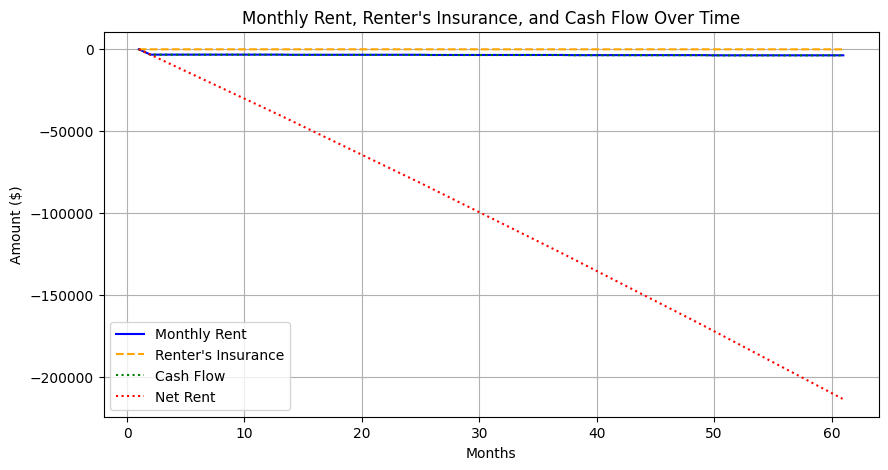

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

def mcf_line_plot(mcf,query):
    # Generate a time axis for the x-axis
    time_axis = np.arange(1, query.hold_period_m + 2)  # months

    plt.figure(figsize=(10, 5))
    plt.plot(time_axis, mcf.mcf_rent, label="Monthly Rent", color='blue')
    plt.plot(time_axis, mcf.mcf_rent_insur, label="Renter's Insurance", color='orange', linestyle='--')
    plt.plot(time_axis, mcf.mcf_rent_cashflow, label="Cash Flow", color='green', linestyle=':')
    plt.plot(time_axis, mcf.mcf_net_rent, label="Net Rent", color='red', linestyle=':')
    plt.title("Monthly Rent, Renter's Insurance, and Cash Flow Over Time")
    plt.xlabel("Months")
    plt.ylabel("Amount ($)")
    plt.legend()
    plt.grid()
    plt.show()


mcf_line_plot(MRCF,test_query)

## MCF Unlevered Own Scenario:
Monthly cash flow for the unlevered owner scenario.

In [15]:
'''
# initialize the arguments to their starting values...
mcf_month = 1
mcf_year = 0

# --------------------------------------------------------------------------------------------------------------- # 
# Computes various rent appreciations across study period...
def mcf_own_func(month, year, hold_period_m, tax, inflation, duration):
    own_list = np.zeros(duration+1)
    for i in range(1, duration+1):
        year = np.ceil(month/12)
        if month>0 and month<=hold_period_m:
            own_list[i] = -(tax/12)*((1 + inflation/100)**(year-1))
        month += 1
    return own_list

# Computes property tax shield across study period...
def mcf_pts_func(bool_salt, salt_limit, bool_federal, rate_federal_tax, mcf_prop_tax, duration):
    pts = np.zeros(duration+1)
    for i in range(1, duration+1):
        if bool_salt:
            pts[i] = min(-mcf_prop_tax[i], salt_limit/12)
        else:
            pts[i] = -mcf_prop_tax[i]
        if bool_federal:
            pts[i] = pts[i] * (rate_federal_tax/100)
    return pts

# Helper-function to populate the following set of entries...
def input_gen(func,arg1,arg2,arg3,arg4,arg5,arg6):
    if arg6 == 0:
        own_list = func(arg1,arg2,arg3,arg4,arg5)
    else:
        own_list = func(arg1,arg2,arg3,arg4,arg5,arg6)
    #own_list =  list(np.around(np.array(own_list),0))
    return own_list

# --------------------------------------------------------------------------------------------------------------- #
# Populate all renter's fields across study period...

# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! #
# This section could be much more efficient, I am sure...

mcf_acquis = np.zeros(hold_period_m+1)
mcf_acquis_costs = np.zeros(hold_period_m+1)
mcf_sale = np.zeros(hold_period_m+1)
mcf_dispo_costs = np.zeros(hold_period_m+1)
mcf_unlv_own_cf = np.zeros(hold_period_m+1)
mcf_unlv_net_cf = np.zeros(hold_period_m+1)

mcf_acquis[0] = -purchase_price
mcf_acquis_costs[0] = -total_acquisition

#mcf_sale[hold_period_m] = np.round(purchase_price*(1 + (home_appreciation/100))**hold_period, 0)
#mcf_dispo_costs[hold_period_m] = -np.round(total_disposition)
mcf_sale[hold_period_m] = purchase_price*(1 + (home_appreciation/100))**hold_period
#mcf_dispo_costs[hold_period_m] = -total_disposition
mcf_dispo_costs[hold_period_m] = -(0.055 * mcf_sale[hold_period_m])

mcf_prop_tax = input_gen(mcf_own_func, mcf_month, mcf_year, hold_period_m, property_tax, ret_inflation, hold_period_m)
mcf_prop_tax_shield = input_gen(mcf_pts_func,bool_salt, salt_limit, bool_federal, rate_federal_tax, mcf_prop_tax, hold_period_m)
mcf_insurance = input_gen(mcf_own_func, mcf_month, mcf_year, hold_period_m, home_insurance, other_inflation, hold_period_m)
mcf_maintenance = input_gen(mcf_own_func, mcf_month, mcf_year, hold_period_m, home_maintenance, other_inflation, hold_period_m)
mcf_hoa_dues = input_gen(mcf_own_func, mcf_month, mcf_year, hold_period_m, hoa_util*12, other_inflation, hold_period_m)

mcf_unlv_net = np.zeros(hold_period_m+1)

for i in range(hold_period_m+1):
    if i == 0:
        mcf_unlv_own_cf[i] = np.sum((mcf_acquis[i],mcf_acquis_costs[i]))
        mcf_unlv_net_cf[i] = np.subtract(mcf_unlv_own_cf[i],mcf_rent_cashflow[i])
        mcf_unlv_net[i] = mcf_unlv_own_cf[i]
    elif i < hold_period_m:
        mcf_unlv_own_cf[i] = np.sum((mcf_dispo_costs[i],mcf_prop_tax[i],mcf_prop_tax_shield[i],mcf_insurance[i],mcf_maintenance[i],mcf_hoa_dues[i]))
        mcf_unlv_net_cf[i] = np.subtract(mcf_unlv_own_cf[i],mcf_rent_cashflow[i])
        mcf_unlv_net[i] = mcf_unlv_net[i-1] + mcf_unlv_own_cf[i]
    else:
        mcf_unlv_own_cf[i] = np.sum((mcf_dispo_costs[i],mcf_prop_tax[i],mcf_prop_tax_shield[i],mcf_insurance[i],mcf_maintenance[i],mcf_hoa_dues[i]))
        mcf_unlv_own_cf[i] = np.sum([mcf_unlv_own_cf[i], mcf_sale[i]])
        mcf_unlv_net_cf[i] = np.subtract(mcf_unlv_own_cf[i],mcf_rent_cashflow[i])
        mcf_unlv_net[i] = mcf_unlv_net[i-1] + mcf_unlv_own_cf[i]

gross_sale_30y = np.sum(mcf_sale)
print("Gross Sale Price: ${}".format(gross_sale_30y))
# --------------------------------------------------------------------------------------------------------------- #
# Sum unlevered owner's cash flow, NOTE: sum rounding error accounts for ~$4 below original model...

total_uocf = np.sum(mcf_unlv_own_cf)
print("Total Unlevered Owner Cash Flow: ${}".format(total_uocf))
print("Total Unlevered Owner Cash Flow: ${}".format(mcf_unlv_net[-1]))
'''

class MonthlyUnleveredCashFlow:
    def __init__(self,query,MRCF):
        duration = query.hold_period_m

        self.mcf_month = 1
        self.mcf_year = 0

        self.mcf_acquis = np.zeros(duration+1)
        self.mcf_acquis[0] = -query.purchase_price
        self.mcf_acquis_costs = np.zeros(duration+1)
        self.mcf_acquis_costs[0] = -query.total_acquisition
        self.mcf_sale = np.zeros(duration+1)

        self.mcf_dispo_costs = np.zeros(duration+1)
        self.mcf_unlv_own_cf = np.zeros(duration+1)
        self.mcf_unlv_net_cf = np.zeros(duration+1)
        self.total = np.zeros(duration+1)

        self.mcf_sale[duration] = query.purchase_price*(1 + (query.home_appreciation/100))**query.hold_period
        self.mcf_dispo_costs[duration] = -(0.055 * self.mcf_sale[duration])

        self.mcf_prop_tax = self.mcf_own_func(self.mcf_month, self.mcf_year, duration, query.property_tax, query.ret_inflation)

        self.mcf_prop_tax_shield = self.mcf_pts_func(query.bool_salt, query.salt_limit, query.bool_federal, query.rate_federal_tax, self.mcf_prop_tax, duration)

        self.mcf_insurance = self.mcf_own_func(self.mcf_month, self.mcf_year, duration, query.home_insurance, query.other_inflation)
        self.mcf_maintenance = self.mcf_own_func(self.mcf_month, self.mcf_year, duration, query.home_maintenance, query.other_inflation)
        self.mcf_hoa_dues = self.mcf_own_func(self.mcf_month, self.mcf_year, duration, query.hoa_util*12, query.other_inflation)

        self.mcf_unlv_own_cf[0] = self.total[0] = np.sum((self.mcf_acquis[0],self.mcf_acquis_costs[0]))
        self.mcf_unlv_net_cf[0] = np.subtract(self.mcf_unlv_own_cf[0], MRCF.mcf_rent_cashflow[0])

        for i in range(1,duration+1):
            if i < duration:
                self.mcf_unlv_own_cf[i] = np.sum((self.mcf_dispo_costs[i],self.mcf_prop_tax[i],self.mcf_prop_tax_shield[i],self.mcf_insurance[i],self.mcf_maintenance[i],self.mcf_hoa_dues[i]))
                self.mcf_unlv_net_cf[i] = np.subtract(self.mcf_unlv_own_cf[i], MRCF.mcf_rent_cashflow[i])
                self.total[i] = self.total[i-1] + self.mcf_unlv_own_cf[i]
            else:
                self.mcf_unlv_own_cf[i] = np.sum((self.mcf_dispo_costs[i],self.mcf_prop_tax[i],self.mcf_prop_tax_shield[i],self.mcf_insurance[i],self.mcf_maintenance[i],self.mcf_hoa_dues[i]))
                self.mcf_unlv_own_cf[i] = np.sum([self.mcf_unlv_own_cf[i], self.mcf_sale[i]])
                self.mcf_unlv_net_cf[i] = np.subtract(self.mcf_unlv_own_cf[i], MRCF.mcf_rent_cashflow[i])
                self.total[i] = self.total[i-1] + self.mcf_unlv_own_cf[i]
        
        self.gross_sale_30y = np.sum(self.mcf_sale)
        self.total_mucf = np.sum(self.mcf_unlv_own_cf)

    def __str__(self):
        for key,value in vars(self).items():
            print(f"{key}: {value}")

    # Computes various rent appreciations across study period...
    def mcf_own_func(self, month, year, hold_period_m, tax, inflation):
        own_list = np.zeros(hold_period_m+1)
        for i in range(1, hold_period_m+1):
            year = np.ceil(month/12)
            if month>0 and month<=hold_period_m:
                own_list[i] = -(tax/12)*((1 + inflation/100)**(year-1))
            month += 1
        return own_list

    # Computes property tax shield across study period...
    def mcf_pts_func(self, bool_salt, salt_limit, bool_federal, rate_federal_tax, mcf_prop_tax, hold_period_m):
        pts = np.zeros(hold_period_m+1)
        for i in range(1, hold_period_m+1):
            if bool_salt:
                pts[i] = min(-mcf_prop_tax[i], salt_limit/12)
            else:
                pts[i] = -mcf_prop_tax[i]
            if bool_federal:
                pts[i] = pts[i] * (rate_federal_tax/100)
        return pts
    
    def mcf_unlevered_dataframe(self,query,transpose=False):
        mcf_own_dict = {"Years": query.years,
                    "Months": query.months,
                    "Acquisition": self.mcf_acquis,
                    "Acquisition Costs": self.mcf_acquis_costs,
                    "Sale": self.mcf_sale,
                    "Disposition Costs": self.mcf_dispo_costs,
                    "Property Tax": self.mcf_prop_tax,
                    "Property Tax Shield": self.mcf_prop_tax_shield,
                    "Insurance": self.mcf_insurance,
                    "Maintenance": self.mcf_maintenance,
                    "Condo Dues": self.mcf_hoa_dues,
                    "Unlevered Owner Cash Flow": self.mcf_unlv_own_cf,
                    "Unlevered Net Cash Flow": self.mcf_unlv_net_cf,
                    "Unlevered Total": self.total}
        
        if transpose:
            mcf_own_table = pd.DataFrame(data=mcf_own_dict).set_index(["Years","Months"]).transpose()
        else:
            mcf_own_table = pd.DataFrame(data=mcf_own_dict).set_index(["Years","Months"])

        return mcf_own_table
    

MUCF = MonthlyUnleveredCashFlow(test_query, MRCF)
MUCF.__str__()

print("Total Unlevered Owner Cash Flow: ${}".format(MUCF.total[-1]))

df_unlevered = MUCF.mcf_unlevered_dataframe(test_query, transpose=True)
df_unlevered

mcf_month: 1
mcf_year: 0
mcf_acquis: [-500000.       0.       0.       0.       0.       0.       0.       0.
       0.       0.       0.       0.       0.       0.       0.       0.
       0.       0.       0.       0.       0.       0.       0.       0.
       0.       0.       0.       0.       0.       0.       0.       0.
       0.       0.       0.       0.       0.       0.       0.       0.
       0.       0.       0.       0.       0.       0.       0.       0.
       0.       0.       0.       0.       0.       0.       0.       0.
       0.       0.       0.       0.       0.]
mcf_acquis_costs: [-7750.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.    

Years                           0.0            1.0                 \
Months                           0              1              2    
Acquisition               -500000.0       0.000000       0.000000   
Acquisition Costs           -7750.0       0.000000       0.000000   
Sale                            0.0       0.000000       0.000000   
Disposition Costs               0.0       0.000000       0.000000   
Property Tax                    0.0    -250.000000    -250.000000   
Property Tax Shield             0.0      87.500000      87.500000   
Insurance                       0.0    -250.000000    -250.000000   
Maintenance                     0.0    -416.666667    -416.666667   
Condo Dues                      0.0    -104.166667    -104.166667   
Unlevered Owner Cash Flow -507750.0    -933.333333    -933.333333   
Unlevered Net Cash Flow   -507750.0    2416.666667    2416.666667   
Unlevered Total           -507750.0 -508683.333333 -509616.666667   

Years                                                                   \
Months                                3              4              5    
Acquisition                     0.000000       0.000000       0.000000   
Acquisition Costs               0.000000       0.000000       0.000000   
Sale                            0.000000       0.000000       0.000000   
Disposition Costs               0.000000       0.000000       0.000000   
Property Tax                 -250.000000    -250.000000    -250.000000   
Property Tax Shield            87.500000      87.500000      87.500000   
Insurance                    -250.000000    -250.000000    -250.000000   
Maintenance                  -416.666667    -416.666667    -416.666667   
Condo Dues                   -104.166667    -104.166667    -104.166667   
Unlevered Owner Cash Flow    -933.333333    -933.333333    -933.333333   
Unlevered Net Cash Flow      2416.666667    2416.666667    2416.666667   
Unlevered Total           -510550.000000 -511483.333333 -512416.666667   

Years                                                                   \
Months                                6              7              8    
Acquisition                     0.000000       0.000000       0.000000   
Acquisition Costs               0.000000       0.000000       0.000000   
Sale                            0.000000       0.000000       0.000000   
Disposition Costs               0.000000       0.000000       0.000000   
Property Tax                 -250.000000    -250.000000    -250.000000   
Property Tax Shield            87.500000      87.500000      87.500000   
Insurance                    -250.000000    -250.000000    -250.000000   
Maintenance                  -416.666667    -416.666667    -416.666667   
Condo Dues                   -104.166667    -104.166667    -104.166667   
Unlevered Owner Cash Flow    -933.333333    -933.333333    -933.333333   
Unlevered Net Cash Flow      2416.666667    2416.666667    2416.666667   
Unlevered Total           -513350.000000 -514283.333333 -515216.666667   

Years                                     ...            5.0                 \
Months                                9   ...             51             52   
Acquisition                     0.000000  ...       0.000000       0.000000   
Acquisition Costs               0.000000  ...       0.000000       0.000000   
Sale                            0.000000  ...       0.000000       0.000000   
Disposition Costs               0.000000  ...       0.000000       0.000000   
Property Tax                 -250.000000  ...    -281.377203    -281.377203   
Property Tax Shield            87.500000  ...      98.482021      98.482021   
Insurance                    -250.000000  ...    -281.377203    -281.377203   
Maintenance                  -416.666667  ...    -468.962004    -468.962004   
Condo Dues                   -104.166667  ...    -117.240501    -117.240501   
Unlevered Owner Cash Flow    -933.333333  ...   -1050.474889   -1050.474889   
Unlevered N

In [16]:
#mcf_combo_table = pd.merge(mcf_rent_table, mcf_own_table, left_on=["Years","Months"], right_on=["Years","Months"])
#mcf_combo_table

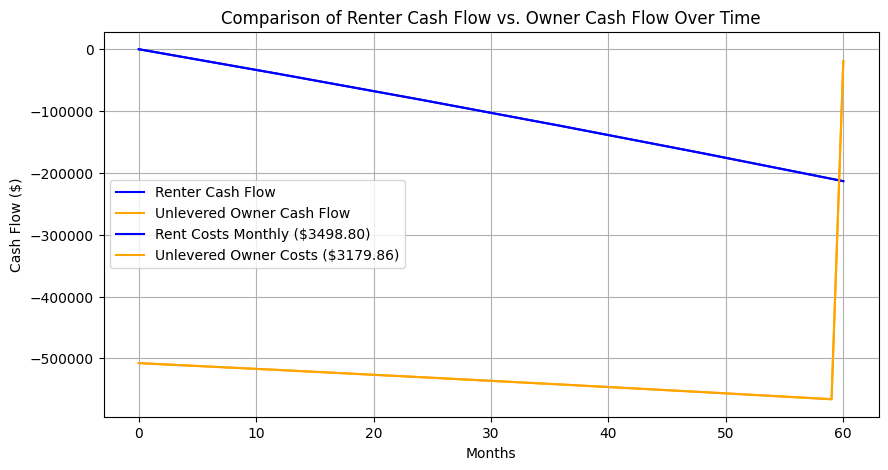

In [17]:
'''def mcf_combo_line_plot():
    # Assuming you have the same time axis for both rental and ownership cash flows
    time_axis = np.arange(0, test_query.hold_period_m + 1)  # months

    # Assuming mcf_unlv_net_cf is defined and has the same length as mcf_rent_cashflow
    plt.figure(figsize=(10, 5))
    plt.plot(time_axis, MCF.mcf_net_rent, label="Renter Cash Flow", color='blue')
    plt.plot(time_axis, MUCF.total, label="Unlevered Owner Cash Flow", color='orange')
    plt.title("Comparison of Renter Cash Flow vs. Owner Cash Flow Over Time")
    plt.xlabel("Months")
    plt.ylabel("Cash Flow ($)")
    plt.legend()
    plt.grid()
    plt.show()

mcf_combo_line_plot()'''
def mcf_combo_line_plot():
    # Assuming you have the same time axis for both rental and ownership cash flows
    time_axis = np.arange(0, test_query.hold_period_m + 1)  # months

    # Assuming MCF.mcf_net_rent and MUCF.total are defined and have the same length as the time axis
    avg_renter_cost = np.mean(MRCF.mcf_rent_cashflow)
    avg_owner_cost = np.mean(MUCF.mcf_unlv_net_cf)

    plt.figure(figsize=(10, 5))

    # Plotting cash flows
    plt.plot(time_axis, MRCF.mcf_net_rent, label="Renter Cash Flow", color='blue')
    plt.plot(time_axis, MUCF.total, label="Unlevered Owner Cash Flow", color='orange')

    # Adding average monthly cost lines
    #plt.axhline(avg_renter_cost, color='blue', linestyle='--', linewidth=1, label=f"Avg Renter Cost: ${avg_renter_cost:.2f}")
    #plt.axhline(avg_owner_cost, color='orange', linestyle='--', linewidth=1, label=f"Avg Owner Cost: ${avg_owner_cost:.2f}")
    plt.plot(time_axis, MRCF.mcf_net_rent, label=f"Rent Costs Monthly (${-avg_renter_cost:.2f})", color='blue')
    plt.plot(time_axis, MUCF.total, label=f"Unlevered Owner Costs (${avg_owner_cost:.2f})", color='orange')

    # Adding title, labels, legend, and grid
    plt.title("Comparison of Renter Cash Flow vs. Owner Cash Flow Over Time")
    plt.xlabel("Months")
    plt.ylabel("Cash Flow ($)")
    plt.legend()
    plt.grid()

    plt.show()

# Call the function to plot
mcf_combo_line_plot()


## MCF Levered Owner Scenario:
Monthly cash flow for the levered owner scenario.

In [22]:
'''
# --------------------------------------------------------------------------------------------------------------- # 
# Helper function for calculating monthly loan payments...

def pmt_func(rate, nper, pv):
    #rate = rate/100
    return pv * (rate) / (1 - (1 + rate)**(-nper))

# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! #
# Initializes arrays and populates them...

mcfl_loan_proc = np.zeros(hold_period_m+1)
loan_repay = np.zeros(hold_period_m+1)
mcfl_loan_points = np.zeros(hold_period_m+1)
mcfl_amort = np.zeros(hold_period_m+1)
interest = np.zeros(hold_period_m+1)
mcfl_interest_tax_shield = np.zeros(hold_period_m+1)
mcfl_mortgage_insurance = np.zeros(hold_period_m+1)
mcfl_lv_own_cf = np.zeros(hold_period_m+1)
mcfl_lv_net_cf = np.zeros(hold_period_m+1)
mcfl_lv_ge = np.zeros(hold_period_m+1)
mcfl_lv_ne = np.zeros(hold_period_m+1)

mcfl_loan_proc[0] = loan_ltv_desired
mcfl_loan_points[0] = -mortgage_points

mcfl_net = np.zeros(hold_period_m+1)

mcf_month=0

# pull out any rate adjustment operations, need to gain back some efficiency here...
for i in range(hold_period_m+1):
    if mcf_month > 0 and mcf_month <= hold_period_m:
        mcfl_interest[i] = -np.round(np.sum([mcfl_loan_proc[:i], mcfl_loan_repay[:i], mcfl_amort[:i]]),2) * (rate_home_loan/100/12)
        mcfl_amort[i] = -pmt_func(rate_home_loan/100, amort_home_loan, purchase_price*rate_ltv_desired/100)/12 - mcfl_interest[i]
        mcfl_interest_tax_shield[i] = -mcfl_interest[i] * rate_federal_tax/100
        mcfl_mortgage_insurance[i] = -((rate_mortgage_insurance/100)/12) * np.max(purchase_price*(rate_ltv_desired/100 - clear_mortgage_insurance/100),0) * \
                                    ((np.sum([mcfl_loan_proc[:i], mcfl_loan_repay[:i], mcfl_amort[:i]]) - purchase_price*clear_mortgage_insurance/100) > 0)
        #mcfl_lv_ge[i] = mcfl_lv_ge[i-1] + mcfl_lv_own_cf[i]
        if mcf_month == hold_period_m:
            mcfl_loan_repay[-1] = -(np.sum(mcfl_amort) + mcfl_loan_proc[0])
    mcfl_lv_own_cf[i] = np.sum([mcf_unlv_own_cf[i], mcfl_loan_proc[i], mcfl_loan_repay[i], mcfl_amort[i], mcfl_loan_points[i], mcfl_interest[i], mcfl_interest_tax_shield[i], mcfl_mortgage_insurance[i]])
    mcfl_lv_net_cf[i] = mcfl_lv_own_cf[i] - mcf_rent_cashflow[i]

    if mcf_month == 0:
        mcfl_lv_ge[i] = mcfl_lv_own_cf[i]
        mcfl_lv_ne[i] = mcfl_lv_net_cf[i]
        mcfl_net[i] = mcfl_lv_own_cf[i]
    else:
        mcfl_lv_ge[i] = mcfl_lv_ge[i-1] + mcfl_lv_own_cf[i]
        mcfl_lv_ne[i] = mcfl_lv_ne[i-1] + mcfl_lv_net_cf[i]
        mcfl_net[i] = mcfl_net[i-1] + mcfl_lv_own_cf[i]

    mcf_month +=1

mcfl_loan_repay[-1] = -(np.sum(mcfl_amort) + mcfl_loan_proc[0])

# --------------------------------------------------------------------------------------------------------------- #
# Sum levered owner's cash flow, NOTE: sum rounding error accounts for ~$14 below original model (prior to setting final value rounding)...

total_locf = np.sum(mcfl_lv_own_cf)
print("Total Levered Owner Cash Flow: ${}".format(total_locf))
print("Total Levered Owner Cash Flow: ${}".format(mcfl_net[-1]))
'''

class MonthlyLeveredCashFlow:
    def __init__(self,query,MRCF,MUCF):
        duration = query.hold_period_m

        self.mcf_month = 1
        self.mcf_year = 0

        self.mcfl_loan_proc = np.zeros(duration+1)
        self.mcfl_loan_repay = np.zeros(duration+1)
        self.mcfl_loan_points = np.zeros(duration+1)
        self.mcfl_amort = np.zeros(duration+1)
        self.mcfl_interest = np.zeros(duration+1)
        self.mcfl_interest_tax_shield = np.zeros(duration+1)
        self.mcfl_mortgage_insurance = np.zeros(duration+1)
        self.mcfl_lv_own_cf = np.zeros(duration+1)
        self.mcfl_lv_net_cf = np.zeros(duration+1)
        self.gross_total = np.zeros(duration+1)
        self.net_equity = np.zeros(duration+1)

        self.mcfl_loan_proc[0] = query.loan_ltv_desired
        self.mcfl_loan_points[0] = -query.mortgage_points

        #self.mcfl_lv_ge[0] = self.mcfl_net[0] = np.sum([mcf_unlv_own_cf[0], mcfl_loan_proc[0], mcfl_loan_repay[0], mcfl_amort[0], mcfl_loan_points[0], mcfl_interest[0], mcfl_interest_tax_shield[0], mcfl_mortgage_insurance[0]])
        #self.mcfl_lv_ne[0] =self.mcfl_lv_own_cf[0] - self.mcf_rent_cashflow[0]

        # pull out any rate adjustment operations, need to gain back some efficiency here...
        self.populate_tables(query,MRCF,MUCF)

        self.mcfl_loan_repay[-1] = -(np.sum(self.mcfl_amort) + self.mcfl_loan_proc[0])

    def __str__(self):
        for key,value in vars(self).items():
            print(f"{key}: {value}")

    def pmt_func(self, rate, nper, pv):
        #rate = rate/100
        return pv * (rate) / (1 - (1 + rate)**(-nper))
    
    def populate_tables(self,query,MRCF,MUCF):
        duration = query.hold_period_m
        month = 0
        for i in range(duration+1):
            if month > 0 and month <= duration:
                self.mcfl_interest[i] = -np.round(np.sum([self.mcfl_loan_proc[:i], self.mcfl_loan_repay[:i], self.mcfl_amort[:i]]),2) * (query.rate_home_loan/100/12)
                self.mcfl_amort[i] = -self.pmt_func(query.rate_home_loan/100, query.amort_home_loan, query.purchase_price*query.rate_ltv_desired/100)/12 - self.mcfl_interest[i]
                self.mcfl_interest_tax_shield[i] = -self.mcfl_interest[i] * query.rate_federal_tax/100
                self.mcfl_mortgage_insurance[i] = -((query.rate_mortgage_insurance/100)/12) * np.max(query.purchase_price*(query.rate_ltv_desired/100 - query.clear_mortgage_insurance/100),0) * \
                                            ((np.sum([self.mcfl_loan_proc[:i], self.mcfl_loan_repay[:i], self.mcfl_amort[:i]]) - query.purchase_price*query.clear_mortgage_insurance/100) > 0)
                #mcfl_lv_ge[i] = mcfl_lv_ge[i-1] + mcfl_lv_own_cf[i]
                if month == duration:
                    self.mcfl_loan_repay[-1] = -(np.sum(self.mcfl_amort) + self.mcfl_loan_proc[0])

            self.mcfl_lv_own_cf[i] = np.sum([MUCF.mcf_unlv_own_cf[i],self.mcfl_loan_proc[i],self.mcfl_loan_repay[i],self.mcfl_amort[i],self.mcfl_loan_points[i],self.mcfl_interest[i],self.mcfl_interest_tax_shield[i],self.mcfl_mortgage_insurance[i]])
            self.mcfl_lv_net_cf[i] = self.mcfl_lv_own_cf[i] - MRCF.mcf_rent_cashflow[i]

            if month == 0:
                self.gross_total[i] = self.mcfl_lv_own_cf[i]
                self.net_equity[i] = self.mcfl_lv_net_cf[i]
            else:
                self.gross_total[i] = self.gross_total[i-1] + self.mcfl_lv_own_cf[i]
                self.net_equity[i] = self.net_equity[i-1] + self.mcfl_lv_net_cf[i]

            month +=1

        self.mcfl_loan_repay[-1] = -(np.sum(self.mcfl_amort) + self.mcfl_loan_proc[0])
    
    def mcf_levered_dataframe(self,query,transpose=False):
        mcfl_own_dict = {"Years": query.years,
                    "Months": query.months,
                    "Loan Proceeds": self.mcfl_loan_proc,
                    "Loan Repayment": self.mcfl_loan_repay,
                    "Amortization": self.mcfl_amort,
                    "Loan Points": self.mcfl_loan_points,
                    "Interest": self.mcfl_interest,
                    "Interest Tax Shield": self.mcfl_interest_tax_shield,
                    "Mortgage Insurance": self.mcfl_mortgage_insurance,
                    "Levered Owner Cash Flow": self.mcfl_lv_own_cf,
                    "Levered Net Cash Flow": self.mcfl_lv_net_cf,
                    "Cum. Gross Equity": self.gross_total,
                    "Cum. Net Equity": self.net_equity}
        
        if transpose:
            mcfl_own_table = pd.DataFrame(data=mcfl_own_dict).set_index(["Years","Months"]).transpose()
        else:
            mcfl_own_table = pd.DataFrame(data=mcfl_own_dict).set_index(["Years","Months"])

        return mcfl_own_table


MLCF = MonthlyLeveredCashFlow(test_query, MRCF, MUCF)
MLCF.__str__()

print("Total Levered Owner Cash Flow (Gross): ${}".format(MLCF.gross_total[-1]))
print("Total Levered Owner Cash Flow (Net): ${}".format(MLCF.net_equity[-1]))

df_levered = MLCF.mcf_levered_dataframe(test_query,transpose=True)
df_levered

mcf_month: 1
mcf_year: 0
mcfl_loan_proc: [400000.      0.      0.      0.      0.      0.      0.      0.      0.
      0.      0.      0.      0.      0.      0.      0.      0.      0.
      0.      0.      0.      0.      0.      0.      0.      0.      0.
      0.      0.      0.      0.      0.      0.      0.      0.      0.
      0.      0.      0.      0.      0.      0.      0.      0.      0.
      0.      0.      0.      0.      0.      0.      0.      0.      0.
      0.      0.      0.      0.      0.      0.      0.]
mcfl_loan_repay: [      0.               0.               0.               0.
       0.               0.               0.               0.
       0.               0.               0.               0.
       0.               0.               0.               0.
       0.               0.               0.               0.
       0.               0.               0.               0.
       0.               0.               0.               0.
       0.          

Years                         0.0            1.0                 \
Months                         0              1              2    
Loan Proceeds            400000.0       0.000000       0.000000   
Loan Repayment                0.0       0.000000       0.000000   
Amortization                  0.0    -352.880117    -354.938584   
Loan Points               -4000.0       0.000000       0.000000   
Interest                      0.0   -2333.333333   -2331.274867   
Interest Tax Shield           0.0     816.666667     815.946203   
Mortgage Insurance            0.0      -0.000000      -0.000000   
Levered Owner Cash Flow -111750.0   -2802.880117   -2803.600580   
Levered Net Cash Flow   -111750.0     547.119883     546.399420   
Cum. Gross Equity       -111750.0 -114552.880117 -117356.480697   
Cum. Net Equity         -111750.0 -111202.880117 -110656.480697   

Years                                                                 \
Months                              3              4              5    
Loan Proceeds                 0.000000       0.000000       0.000000   
Loan Repayment                0.000000       0.000000       0.000000   
Amortization               -357.009067    -359.091625    -361.186317   
Loan Points                   0.000000       0.000000       0.000000   
Interest                  -2329.204383   -2327.121825   -2325.027133   
Interest Tax Shield         815.221534     814.492639     813.759497   
Mortgage Insurance           -0.000000      -0.000000      -0.000000   
Levered Owner Cash Flow   -2804.325250   -2805.054145   -2805.787287   
Levered Net Cash Flow       545.674750     544.945855     544.212713   
Cum. Gross Equity       -120160.805947 -122965.860092 -125771.647379   
Cum. Net Equity         -110110.805947 -109565.860092 -109021.647379   

Years                                                                 \
Months                              6              7              8    
Loan Proceeds                 0.000000       0.000000       0.000000   
Loan Repayment                0.000000       0.000000       0.000000   
Amortization               -363.293259    -365.412450    -367.544009   
Loan Points                   0.000000       0.000000       0.000000   
Interest                  -2322.920192   -2320.801000   -2318.669442   
Interest Tax Shield         813.022067     812.280350     811.534305   
Mortgage Insurance           -0.000000      -0.000000      -0.000000   
Levered Owner Cash Flow   -2806.524717   -2807.266434   -2808.012479   
Levered Net Cash Flow       543.475283     542.733566     541.987521   
Cum. Gross Equity       -128578.172096 -131385.438529 -134193.451008   
Cum. Net Equity         -108478.172096 -107935.438529 -107393.451008   

Years                                   ...            5.0                 \
Months                              9   ...             51             52   
Loan Proceeds                 0.000000  ...       0.000000       0.000000   
Loan Repayment                0.000000  ...       0.000000       0.000000   
Amortization               -369.688050  ...    -471.985234    -474.738450   
Loan Points                   0.000000  ...       0.000000       0.000000   
Interest                  -2316.525400  ...   -2214.228217   -2211.475000   
Interest Tax Shield         810.783890  ...     774.979876     774.016250   
Mortgage Insurance           -0.000000  ...      -0.000000      -0.000000   
Levered Owner Cash Flow   -2808.762894  ...   -2961.708464   -2962.672090   
Levered Net Cash Flow       541.237106  ...     808.741536     807.777910   
Cum. Gross Equity       -137002.213902  ... -258117.523468 -261080.195557   
Cum. Net Equity         -106852.213902  ...  -78624.493468  -77816.715557   

Years                                                                 \
Months                              53             54             55   
Loan Proceeds                 0.000000       0.000000       0.000000   
Loan Repayment                0.0000

In [23]:
class MonthlyCashFlow:
    def __init__(self,query):
        self.query = query
        self.MRCF = MonthlyRentCashFlow(query)
        self.MUCF = MonthlyUnleveredCashFlow(query, self.MRCF)
        self.MLCF = MonthlyLeveredCashFlow(query, self.MRCF, self.MUCF)

    def __plot__(self):
        # Assuming you have the same time axis for both rental and ownership cash flows
        time_axis = np.arange(0, self.query.hold_period_m + 1)  # months
        avg_renter_cost = np.mean(self.MRCF.mcf_rent_cashflow)
        avg_unlv_cost = np.mean(self.MUCF.mcf_unlv_net_cf)
        avg_lv_cost = np.mean(self.MLCF.mcfl_lv_net_cf)

        # Assuming mcf_unlv_net_cf is defined and has the same length as mcf_rent_cashflow
        plt.figure(figsize=(12, 6))
        plt.plot(time_axis, self.MRCF.mcf_net_rent, label="Renter Cash Flow", color='blue')
        plt.plot(time_axis, self.MUCF.total, label="Unlevered Owner Cash Flow", color='orange')
        plt.plot(time_axis, self.MLCF.net_equity, label="Levered Owner Cash Flow (Net)", color='green')
        plt.plot(time_axis, self.MLCF.gross_total, label="Levered Owner Cash Flow (Gross)", color='green', linestyle="dotted")

        plt.plot(time_axis, self.MRCF.mcf_net_rent, label=f"Rent Costs Monthly (${-avg_renter_cost:.2f})", color='blue')
        plt.plot(time_axis, self.MUCF.total, label=f"Unlevered Owner Costs (${avg_unlv_cost:.2f})", color='orange')
        plt.plot(time_axis, self.MLCF.net_equity, label=f"Levered Owner Costs (${avg_lv_cost:.2f})", color='green')


        plt.title("Comparison of Renter Cash Flow vs. Owner Cash Flow")
        plt.xlabel("Months")
        plt.ylabel("Cash Flow ($)")
        plt.legend()
        plt.grid()
        plt.show()

    def __df__(self, transpose=False):
        mcf_dict = {"Years": self.query.years,
                "Months": self.query.months,
                "Monthly Rent": self.MRCF.mcf_rent,
                "Renter's Insurance": self.MRCF.mcf_rent_insur,
                "Renter's Cash Flow": self.MRCF.mcf_rent_cashflow,
                "Acquisition": self.MUCF.mcf_acquis,
                "Acquisition Costs": self.MUCF.mcf_acquis_costs,
                "Sale": self.MUCF.mcf_sale,
                "Disposition Costs": self.MUCF.mcf_dispo_costs,
                "Property Tax": self.MUCF.mcf_prop_tax,
                "Property Tax Shield": self.MUCF.mcf_prop_tax_shield,
                "Insurance": self.MUCF.mcf_insurance,
                "Maintenance": self.MUCF.mcf_maintenance,
                "Condo Dues": self.MUCF.mcf_hoa_dues,
                "Unlevered Owner Cash Flow": self.MUCF.mcf_unlv_own_cf,
                "Unlevered Net Cash Flow": self.MUCF.mcf_unlv_net_cf,
                "Loan Proceeds": self.MLCF.mcfl_loan_proc,
                "Loan Repayment": self.MLCF.mcfl_loan_repay,
                "Amortization": self.MLCF.mcfl_amort,
                "Loan Points": self.MLCF.mcfl_loan_points,
                "Interest": self.MLCF.mcfl_interest,
                "Interest Tax Shield": self.MLCF.mcfl_interest_tax_shield,
                "Mortgage Insurance": self.MLCF.mcfl_mortgage_insurance,
                "Levered Owner Cash Flow": self.MLCF.mcfl_lv_own_cf,
                "Levered Net Cash Flow": self.MLCF.mcfl_lv_net_cf,
                "Cum. Gross Equity": self.MLCF.gross_total,
                "Cum. Net Equity": self.MLCF.net_equity}
        
        if transpose:
            return pd.DataFrame(data=mcf_dict).set_index(["Years","Months"]).transpose()
        
        return pd.DataFrame(data=mcf_dict).set_index(["Years","Months"])

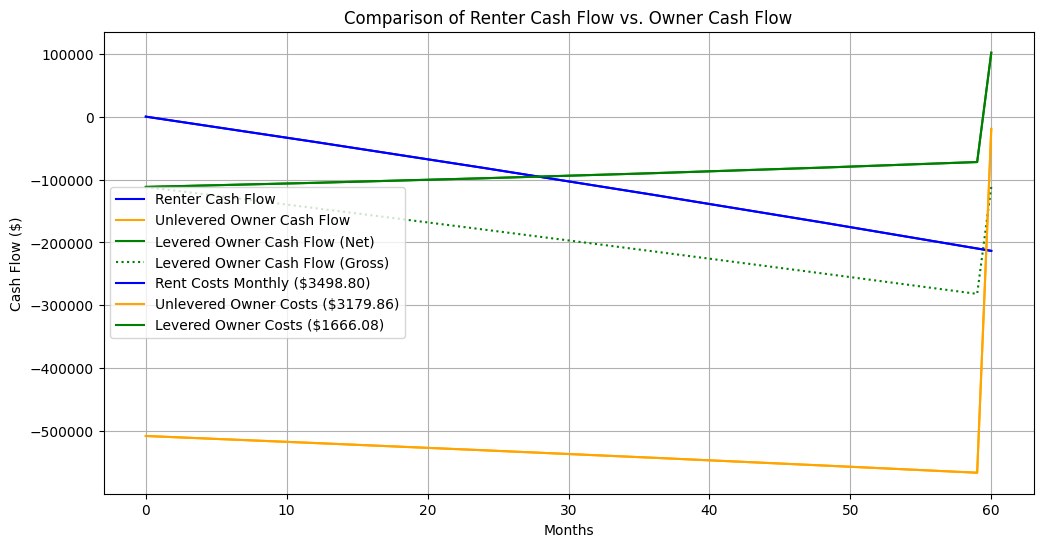

Monthly Rent  Renter's Insurance  Renter's Cash Flow  \
Years Months                                                         
0.0   0               0.00                0.00                0.00   
1.0   1           -3300.00              -50.00            -3350.00   
      2           -3300.00              -50.00            -3350.00   
      3           -3300.00              -50.00            -3350.00   
      4           -3300.00              -50.00            -3350.00   
...                    ...                 ...                 ...   
5.0   56          -3714.18              -56.27            -3770.45   
      57          -3714.18              -56.27            -3770.45   
      58          -3714.18              -56.27            -3770.45   
      59          -3714.18              -56.27            -3770.45   
      60          -3714.18              -56.27            -3770.45   

              Acquisition  Acquisition Costs          Sale  Disposition Costs  \
Years Months                                                                    
0.0   0         -500000.0            -7750.0       0.00000           0.000000   
1.0   1               0.0                0.0       0.00000           0.000000   
      2               0.0                0.0       0.00000           0.000000   
      3               0.0                0.0       0.00000           0.000000   
      4               0.0                0.0       0.00000           0.000000   
...                   ...                ...           ...                ...   
5.0   56              0.0                0.0       0.00000           0.000000   
      57              0.0                0.0       0.00000           0.000000   
      58              0.0                0.0       0.00000           0.000000   
      59              0.0                0.0       0.00000           0.000000   
      60              0.0                0.0  579637.03715      -31880.037043   

              Property Tax  Property Tax Shield   Insurance  ...  \
Years Months                                                 ...   
0.0   0           0.000000             0.000000    0.000000  ...   
1.0   1        -250.000000            87.500000 -250.000000  ...   
      2        -250.000000            87.500000 -250.000000  ...   
      3        -250.000000            87.500000 -250.000000  ...   
      4        -250.000000            87.500000 -250.000000  ...   
...                    ...                  ...         ...  ...   
5.0   56       -281.377203            98.482021 -281.377203  ...   
      57       -281.377203            98.482021 -281.377203  ...   
      58       -281.377203            98.482021 -281.377203  ...   
      59       -281.377203            98.482021 -281.377203  ...   
      60       -281.377203            98.482021 -281.377203  ...   

              Loan Repayment  Amortization  Loan Points     Interest  \
Years Months                                                           
0.0   0             0.000000      0.000000      -4000.0     0.000000   
1.0   1             0.000000   -352.880117          0.0 -2333.333333   
      2             0.000000   -354.938584          0.0 -2331.274867   
      3             0.000000   -357.009067          0.0 -2329.204383   
      4             0.000000   -359.091625          0.0 -2327.121825   
...                      ...           ...          ...          ...   
5.0   56            0.000000   -485.913017          0.0 -2200.300433   
      57            0.000000   -488.747492          0.0 -2197.465958   
      58            0.000000   -491.598534          0.0 -2194.614917   
      59            0.000000   -494.466142          0.0 -2191.747308   
      60      -374736.288386   -497.350550          0.0 -2188.862900   

              Interest Tax Shield  Mortgage Insurance  \
Years Months                                            
0.0   0                  0.000000                 0.0   
1.0   1                816.666667                -0.0   

In [24]:
MCF = MonthlyCashFlow(test_query)
MCF.__plot__()
MCF.__df__()

# Annual Cash Flow:
Annual cash flow table for the duration of the holding period, both rent and own scenarios are tracked here...determined by the host of inputs above.

## ACF Rent Scenario:
Annual cash flow for the renter scenario.

In [22]:
class AnnualRentCashFlow:
    def __init__(self,MCF):
        self.MCF = MCF
        self.years = []
        self.months = []

        hold_period = self.MCF.query.hold_period

        self.rent  = np.zeros(hold_period+1)
        self.acf_rent_insur = np.zeros(hold_period+1)
        self.acf_rent_cashflow = np.zeros(hold_period+1)
        self.total = 0
        self.rent_insurance = 0
        self.rent_cf = 0
        
        self.__arcf__()

    def __arcf__(self):
        months = self.MCF.query.months
        hold_period = self.MCF.query.hold_period
        hold_period_m = self.MCF.query.hold_period_m

        self.acf_years = months[:hold_period+1]
        self.acf_months = np.zeros(hold_period+1)
        for i in range(1, hold_period+1):
            self.acf_months[i] = self.acf_years[i]*12

        m = 1
        for i in range(12,hold_period_m+1,12):
            self.acf_rent[m] = np.sum(self.MCF.MRCF.mcf_rent[i-11:i+1])
            self.acf_rent_insur[m] = np.sum(self.MCF.MRCF.mcf_rent_insur[i-11:i+1])
            self.acf_rent_cashflow[m] = np.sum([self.acf_rent[m], self.acf_rent_insur[m]])
            m += 1

        self.total = np.sum(acf_rent)
        self.rent_insurance = np.sum(acf_rent_insur)
        self.rent_cf = np.sum(acf_rent_cashflow)

    def __str__(self):
        print("Total Rent: $", self.total)
        print("Total Renter's Insurance: $", self.rent_insurance)
        print("Total Renter's Cash Flow: $", self.rent_cf)

    def __df__(self):
        acf_rent_dict = {"Years": self.acf_years,
                    "Months": self.acf_months,
                    "Monthly Rent": self.acf_rent,
                    "Renter's Insurance": self.acf_rent_insur,
                    "Renter's Cash Flow": self.acf_rent_cashflow}

        #mcf_rent_table = pd.DataFrame(data=mcf_rent_dict).iloc[47:,:]
        #acf_rent_table = pd.DataFrame(data=acf_rent_dict).set_index(["Years","Months"]).transpose()
        acf_rent_table = pd.DataFrame(data=acf_rent_dict).set_index(["Years","Months"])
        return acf_rent_table

In [23]:
ARCF = AnnualRentCashFlow(MCF)
ARCF.__str__()
ARCF.__df__()

Total Rent: $ -210241.80000000002
Total Renter's Insurance: $ -3185.2799999999997
Total Renter's Cash Flow: $ -213427.08


,,Monthly Rent,Renter's Insurance,Renter's Cash Flow
Years,Months,,,
0,0.0,0.00,0.00,0.00
1,12.0,-39600.00,-600.00,-40200.00
2,24.0,-40788.00,-618.00,-41406.00
3,36.0,-42011.64,-636.48,-42648.12
4,48.0,-43272.00,-655.56,-43927.56
5,60.0,-44570.16,-675.24,-45245.40


In [24]:
'''acf_years = months[:hold_period+1]
acf_months = np.zeros(hold_period+1)
for i in range(1, hold_period+1):
    acf_months[i] = acf_years[i]*12

acf_rent = np.zeros(hold_period+1)
acf_rent_insur = np.zeros(hold_period+1)
acf_rent_cashflow = np.zeros(hold_period+1)

m = 1
for i in range(12,hold_period_m+1,12):
    acf_rent[m] = np.sum(mcf_rent[i-11:i+1])
    acf_rent_insur[m] = np.sum(mcf_rent_insur[i-11:i+1])
    acf_rent_cashflow[m] = np.sum([acf_rent[m],acf_rent_insur[m]])
    m += 1
    
acf_rent_total = np.sum(acf_rent)
acf_rent_insur_total = np.sum(acf_rent_insur)
acf_rent_cashflow_total = np.sum(acf_rent_cashflow)
print("Total Rent: $", acf_rent_total)
print("Total Renter's Insurance: $", acf_rent_insur_total)
print("Total Renter's Cash Flow: $", acf_rent_cashflow_total)'''

'acf_years = months[:hold_period+1]\nacf_months = np.zeros(hold_period+1)\nfor i in range(1, hold_period+1):\n    acf_months[i] = acf_years[i]*12\n\nacf_rent = np.zeros(hold_period+1)\nacf_rent_insur = np.zeros(hold_period+1)\nacf_rent_cashflow = np.zeros(hold_period+1)\n\nm = 1\nfor i in range(12,hold_period_m+1,12):\n    acf_rent[m] = np.sum(mcf_rent[i-11:i+1])\n    acf_rent_insur[m] = np.sum(mcf_rent_insur[i-11:i+1])\n    acf_rent_cashflow[m] = np.sum([acf_rent[m],acf_rent_insur[m]])\n    m += 1\n    \nacf_rent_total = np.sum(acf_rent)\nacf_rent_insur_total = np.sum(acf_rent_insur)\nacf_rent_cashflow_total = np.sum(acf_rent_cashflow)\nprint("Total Rent: $", acf_rent_total)\nprint("Total Renter\'s Insurance: $", acf_rent_insur_total)\nprint("Total Renter\'s Cash Flow: $", acf_rent_cashflow_total)'

In [25]:
'''acf_rent_dict = {"Years": acf_years,
                    "Months": acf_months,
                    "Monthly Rent": acf_rent,
                    "Renter's Insurance": acf_rent_insur,
                    "Renter's Cash Flow": acf_rent_cashflow}

#mcf_rent_table = pd.DataFrame(data=mcf_rent_dict).iloc[47:,:]
#acf_rent_table = pd.DataFrame(data=acf_rent_dict).set_index(["Years","Months"]).transpose()
acf_rent_table = pd.DataFrame(data=acf_rent_dict).set_index(["Years","Months"])
acf_rent_table'''

'acf_rent_dict = {"Years": acf_years,\n                    "Months": acf_months,\n                    "Monthly Rent": acf_rent,\n                    "Renter\'s Insurance": acf_rent_insur,\n                    "Renter\'s Cash Flow": acf_rent_cashflow}\n\n#mcf_rent_table = pd.DataFrame(data=mcf_rent_dict).iloc[47:,:]\n#acf_rent_table = pd.DataFrame(data=acf_rent_dict).set_index(["Years","Months"]).transpose()\nacf_rent_table = pd.DataFrame(data=acf_rent_dict).set_index(["Years","Months"])\nacf_rent_table'

## Annual Unlevered Owner Scenario:
Annual cash flow for the unlevered owner scenario.

In [59]:
class AnnualUnleveredCashFlow:
    def __init__(self, MCF, ARCF):
        self.MCF = MCF
        months = MCF.query.months
        hold_period = MCF.query.hold_period

        self.acf_years = months[:hold_period+1]
        self.acf_months = [year*12 for year in self.acf_years]

        self.acf_acquis = np.zeros(hold_period+1)
        self.acf_acquis_costs = np.zeros(hold_period+1)
        self.acf_sale = np.zeros(hold_period+1)
        self.acf_dispo_costs = np.zeros(hold_period+1)
        self.acf_prop_tax = np.zeros(hold_period+1)
        self.acf_prop_tax_shield = np.zeros(hold_period+1)
        self.acf_insurance = np.zeros(hold_period+1)
        self.acf_maintenance = np.zeros(hold_period+1)
        self.acf_hoa_dues = np.zeros(hold_period+1)
        self.acf_unlv_own_cf = np.zeros(hold_period+1)
        self.acf_unlv_net_cf = np.zeros(hold_period+1)
        self.acf_unlv_own_cashflow_total = 0

        self.__aucf__(ARCF)

    def __aucf__(self,ARCF):
        self.acf_acquis[0] = np.sum(self.MCF.MUCF.mcf_acquis[0])
        self.acf_acquis_costs[0] = np.sum(self.MCF.MUCF.mcf_acquis_costs[0])
        self.acf_sale[-1] = np.sum(self.MCF.MUCF.mcf_sale[-1])
        self.acf_dispo_costs[-1] = np.sum(self.MCF.MUCF.mcf_dispo_costs[-1])

        m = 1
        hold_period_m = self.MCF.query.hold_period_m
        for i in range(12,hold_period_m+1,12):
            self.acf_prop_tax[m] = np.sum(self.MCF.MUCF.mcf_prop_tax[i-11:i+1])
            self.acf_prop_tax_shield[m] = np.sum(self.MCF.MUCF.mcf_prop_tax_shield[i-11:i+1])
            self.acf_insurance[m] = np.sum(self.MCF.MUCF.mcf_insurance[i-11:i+1])
            self.acf_maintenance[m] = np.sum(self.MCF.MUCF.mcf_maintenance[i-11:i+1])
            self.acf_hoa_dues[m] = np.sum(self.MCF.MUCF.mcf_hoa_dues[i-11:i+1])
            m += 1
        
        hold_period = self.MCF.query.hold_period
        for i in range(hold_period+1):
            if i == 0:
                self.acf_unlv_own_cf[i] = np.sum((self.acf_acquis[i], self.acf_acquis_costs[i]))
                self.acf_unlv_net_cf[i] = np.subtract(self.acf_unlv_own_cf[i], ARCF.acf_rent_cashflow[i])
            elif i < hold_period:
                self.acf_unlv_own_cf[i] = np.sum((self.acf_dispo_costs[i], self.acf_prop_tax[i], self.acf_prop_tax_shield[i], self.acf_insurance[i], self.acf_maintenance[i], self.acf_hoa_dues[i]))
                self.acf_unlv_net_cf[i] = np.subtract(self.acf_unlv_own_cf[i], ARCF.acf_rent_cashflow[i])
            else:
                self.acf_unlv_own_cf[i] = np.sum((self.acf_dispo_costs[i], self.acf_prop_tax[i], self.acf_prop_tax_shield[i], self.acf_insurance[i], self.acf_maintenance[i], self.acf_hoa_dues[i]))
                self.acf_unlv_own_cf[i] = np.sum([self.acf_unlv_own_cf[i], self.acf_sale[i]])
                self.acf_unlv_net_cf[i] = np.subtract(self.acf_unlv_own_cf[i], ARCF.acf_rent_cashflow[i])

        self.acf_unlv_own_cashflow_total = np.sum(self.acf_unlv_own_cf)

    def __str__(self):
        print("Total Acquisition: $", sum(self.acf_acquis))
        print("Total Acquisition Costs: $", sum(self.acf_acquis_costs))
        print("Total Sale: $", sum(self.acf_sale))
        print("Total Disposition Costs: $", sum(self.acf_dispo_costs))
        print("Total Property Tax: $", sum(self.acf_prop_tax))
        print("Total Property Tax Shield: $", sum(self.acf_prop_tax_shield))
        print("Total Insurance: $", sum(self.acf_insurance))
        print("Total Maintenance: $", sum(self.acf_maintenance))
        print("Total Condo Dues: $", sum(self.acf_hoa_dues))
        print("Total Unlevered Owner Cash Flow: $", self.acf_unlv_own_cashflow_total)
        print("Total Unlevered Net Cash Flow: $", np.sum(self.acf_unlv_net_cf))
    
    def __df__(self, transpose=False):
        acf_own_dict = {"Years": self.acf_years,
                    "Months": self.acf_months,
                    "Acquisition": self.acf_acquis,
                    "Acquisition Costs": self.acf_acquis_costs,
                    "Sale": self.acf_sale,
                    "Disposition Costs": self.acf_dispo_costs,
                    "Property Tax": self.acf_prop_tax,
                    "Property Tax Shield": self.acf_prop_tax_shield,
                    "Insurance": self.acf_insurance,
                    "Maintenance": self.acf_maintenance,
                    "Condo Dues": self.acf_hoa_dues,
                    "Unlevered Owner Cash Flow": self.acf_unlv_own_cf,
                    "Unlevered Net Cash Flow": self.acf_unlv_net_cf}
        
        if transpose:
            return pd.DataFrame(data=acf_own_dict).set_index(["Years","Months"]).transpose()

        return pd.DataFrame(data=acf_own_dict).set_index(["Years","Months"])

In [60]:
AUCF = AnnualUnleveredCashFlow(MCF,ARCF)
AUCF.__str__()
AUCF.__df__(transpose=True)

Total Acquisition: $ -500000.0
Total Acquisition Costs: $ -7750.0
Total Sale: $ 579637.03715
Total Disposition Costs: $ -31880.03704325
Total Property Tax: $ -15927.40743
Total Property Tax Shield: $ 5574.592600499999
Total Insurance: $ -15927.40743
Total Maintenance: $ -26545.679050000002
Total Condo Dues: $ -6636.419762500001
Total Unlevered Owner Cash Flow: $ -19455.320965250023
Total Unlevered Net Cash Flow: $ 193971.75903475


Years,0,1,2,3,4,5
Months,0,12,24,36,48,60
Acquisition,-500000.0,0.0,0.0,0.000,0.00000,0.000000
Acquisition Costs,-7750.0,0.0,0.0,0.000,0.00000,0.000000
Sale,0.0,0.0,0.0,0.000,0.00000,579637.037150
Disposition Costs,0.0,0.0,0.0,0.000,0.00000,-31880.037043
Property Tax,0.0,-3000.0,-3090.0,-3182.700,-3278.18100,-3376.526430
Property Tax Shield,0.0,1050.0,1081.5,1113.945,1147.36335,1181.784251
Insurance,0.0,-3000.0,-3090.0,-3182.700,-3278.18100,-3376.526430
Maintenance,0.0,-5000.0,-5150.0,-5304.500,-5463.63500,-5627.544050
Condo Dues,0.0,-1250.0,-1287.5,-1326.125,-1365.90875,-1406.886013


In [28]:
'''# Initialize zero arrays for all constant variables...
acf_acquis = np.zeros(hold_period+1)
acf_acquis_costs = np.zeros(hold_period+1)
acf_sale = np.zeros(hold_period+1)
acf_dispo_costs = np.zeros(hold_period+1)

# Initialize variables not needing iteration...
acf_acquis[0] = np.sum(mcf_acquis[0])
acf_acquis_costs[0] = np.sum(mcf_acquis_costs[0])
acf_sale[-1] = np.sum(mcf_sale[-1])
acf_dispo_costs[-1] = np.sum(mcf_dispo_costs[-1])

# Initialize zero arrays for all dynamic variables...
acf_prop_tax = np.zeros(hold_period+1)
acf_prop_tax_shield = np.zeros(hold_period+1)
acf_insurance = np.zeros(hold_period+1)
acf_maintenance = np.zeros(hold_period+1)
acf_hoa_dues = np.zeros(hold_period+1)
acf_unlv_own_cf = np.zeros(hold_period+1)
acf_unlv_net_cf = np.zeros(hold_period+1)

m = 1
for i in range(12,hold_period_m+1,12):
    acf_prop_tax[m] = np.sum(mcf_prop_tax[i-11:i+1])
    acf_prop_tax_shield[m] = np.sum(mcf_prop_tax_shield[i-11:i+1])
    acf_insurance[m] = np.sum(mcf_insurance[i-11:i+1])
    acf_maintenance[m] = np.sum(mcf_maintenance[i-11:i+1])
    acf_hoa_dues[m] = np.sum(mcf_hoa_dues[i-11:i+1])
    m += 1
    
for i in range(hold_period+1):
    if i == 0:
        acf_unlv_own_cf[i] = np.sum((acf_acquis[i], acf_acquis_costs[i]))
        acf_unlv_net_cf[i] = np.subtract(acf_unlv_own_cf[i],acf_rent_cashflow[i])
    elif i < hold_period:
        acf_unlv_own_cf[i] = np.sum((acf_dispo_costs[i],acf_prop_tax[i],acf_prop_tax_shield[i],acf_insurance[i],acf_maintenance[i],acf_hoa_dues[i]))
        acf_unlv_net_cf[i] = np.subtract(acf_unlv_own_cf[i],acf_rent_cashflow[i])
    else:
        acf_unlv_own_cf[i] = np.sum((acf_dispo_costs[i],acf_prop_tax[i],acf_prop_tax_shield[i],acf_insurance[i],acf_maintenance[i],acf_hoa_dues[i]))
        acf_unlv_own_cf[i] = np.sum([acf_unlv_own_cf[i], acf_sale[i]])
        acf_unlv_net_cf[i] = np.subtract(acf_unlv_own_cf[i],acf_rent_cashflow[i])
    
acf_unlv_own_cashflow_total = np.sum(acf_unlv_own_cf)
print("Total Unlevered Owner's Cash Flow: $", acf_unlv_own_cashflow_total)'''

'# Initialize zero arrays for all constant variables...\nacf_acquis = np.zeros(hold_period+1)\nacf_acquis_costs = np.zeros(hold_period+1)\nacf_sale = np.zeros(hold_period+1)\nacf_dispo_costs = np.zeros(hold_period+1)\n\n# Initialize variables not needing iteration...\nacf_acquis[0] = np.sum(mcf_acquis[0])\nacf_acquis_costs[0] = np.sum(mcf_acquis_costs[0])\nacf_sale[-1] = np.sum(mcf_sale[-1])\nacf_dispo_costs[-1] = np.sum(mcf_dispo_costs[-1])\n\n# Initialize zero arrays for all dynamic variables...\nacf_prop_tax = np.zeros(hold_period+1)\nacf_prop_tax_shield = np.zeros(hold_period+1)\nacf_insurance = np.zeros(hold_period+1)\nacf_maintenance = np.zeros(hold_period+1)\nacf_hoa_dues = np.zeros(hold_period+1)\nacf_unlv_own_cf = np.zeros(hold_period+1)\nacf_unlv_net_cf = np.zeros(hold_period+1)\n\nm = 1\nfor i in range(12,hold_period_m+1,12):\n    acf_prop_tax[m] = np.sum(mcf_prop_tax[i-11:i+1])\n    acf_prop_tax_shield[m] = np.sum(mcf_prop_tax_shield[i-11:i+1])\n    acf_insurance[m] = np.su

In [85]:
acf_own_dict = {"Years": acf_years,
                    "Months": acf_months,
                    "Acquisition": acf_acquis,
                    "Acquisition Costs": acf_acquis_costs,
                    "Sale": acf_sale,
                    "Disposition Costs": acf_dispo_costs,
                    "Property Tax": acf_prop_tax,
                    "Property Tax Shield": acf_prop_tax_shield,
                    "Insurance": acf_insurance,
                    "Maintenance": acf_maintenance,
                    "Condo Dues": acf_hoa_dues,
                    "Unlevered Owner Cash Flow": acf_unlv_own_cf,
                    "Unlevered Net Cash Flow": acf_unlv_net_cf}


#acf_own_table = pd.DataFrame(data=acf_own_dict).set_index(["Years","Months"]).transpose()
acf_own_table = pd.DataFrame(data=acf_own_dict).set_index(["Years","Months"])
acf_own_table

,,Acquisition,Acquisition Costs,Sale,Disposition Costs,Property Tax,Property Tax Shield,Insurance,Maintenance,Condo Dues,Unlevered Owner Cash Flow,Unlevered Net Cash Flow
Years,Months,,,,,,,,,,,
0,0.0,-500000.0,-7750.0,0.00000,0.0,0.00000,0.000000,0.00000,0.00000,0.000000,-507750.000000,-507750.000000
1,12.0,0.0,0.0,0.00000,0.0,-3000.00000,1050.000000,-3000.00000,-5000.00000,-1250.000000,-11200.000000,29000.000000
2,24.0,0.0,0.0,0.00000,0.0,-3090.00000,1081.500000,-3090.00000,-5150.00000,-1287.500000,-11536.000000,29870.000000
3,36.0,0.0,0.0,0.00000,0.0,-3182.70000,1113.945000,-3182.70000,-5304.50000,-1326.125000,-11882.080000,30766.040000
4,48.0,0.0,0.0,0.00000,0.0,-3278.18100,1147.363350,-3278.18100,-5463.63500,-1365.908750,-12238.542400,31689.017600
5,60.0,0.0,0.0,579637.03715,-2475.0,-3376.52643,1181.784251,-3376.52643,-5627.54405,-1406.886013,564556.338478,609801.738478


In [86]:
acf_table = pd.merge(acf_rent_table, acf_own_table, left_on=["Years","Months"], right_on=["Years","Months"])
acf_table

,,Monthly Rent,Renter's Insurance,Renter's Cash Flow,Acquisition,Acquisition Costs,Sale,Disposition Costs,Property Tax,Property Tax Shield,Insurance,Maintenance,Condo Dues,Unlevered Owner Cash Flow,Unlevered Net Cash Flow
Years,Months,,,,,,,,,,,,,,
0,0.0,0.00,0.00,0.00,-500000.0,-7750.0,0.00000,0.0,0.00000,0.000000,0.00000,0.00000,0.000000,-507750.000000,-507750.000000
1,12.0,-39600.00,-600.00,-40200.00,0.0,0.0,0.00000,0.0,-3000.00000,1050.000000,-3000.00000,-5000.00000,-1250.000000,-11200.000000,29000.000000
2,24.0,-40788.00,-618.00,-41406.00,0.0,0.0,0.00000,0.0,-3090.00000,1081.500000,-3090.00000,-5150.00000,-1287.500000,-11536.000000,29870.000000
3,36.0,-42011.64,-636.48,-42648.12,0.0,0.0,0.00000,0.0,-3182.70000,1113.945000,-3182.70000,-5304.50000,-1326.125000,-11882.080000,30766.040000
4,48.0,-43272.00,-655.56,-43927.56,0.0,0.0,0.00000,0.0,-3278.18100,1147.363350,-3278.18100,-5463.63500,-1365.908750,-12238.542400,31689.017600
5,60.0,-44570.16,-675.24,-45245.40,0.0,0.0,579637.03715,-2475.0,-3376.52643,1181.784251,-3376.52643,-5627.54405,-1406.886013,564556.338478,609801.738478


## Annual Levered Owner Scenario:
Annual cash flow for the levered owner scenario.

In [54]:
class AnnualLeveredCashFlow:
    def __init__(self, MCF, ARCF, AUCF):
        self.MCF = MCF
        months = MCF.query.months
        hold_period = MCF.query.hold_period

        self.acf_years = months[:hold_period+1]
        self.acf_months = [year*12 for year in self.acf_years]

        self.acfl_loan_proc = np.zeros(hold_period+1)
        self.acfl_loan_repay = np.zeros(hold_period+1)
        self.acfl_loan_points = np.zeros(hold_period+1)

        self.acfl_loan_proc[0] = MCF.query.loan_ltv_desired
        self.acfl_loan_repay[-1] = np.sum(MCF.MLCF.mcfl_loan_repay[-1])
        self.acfl_loan_points[0] = -MCF.query.mortgage_points

        self.acfl_amort = np.zeros(hold_period+1)
        self.acfl_interest = np.zeros(hold_period+1)
        self.acfl_interest_tax_shield = np.zeros(hold_period+1)
        self.acfl_mortgage_insurance = np.zeros(hold_period+1)

        self.acfl_lv_own_cf = np.zeros(hold_period+1)
        self.acfl_lv_net_cf = np.zeros(hold_period+1)
        self.acfl_lv_ge = np.zeros(hold_period+1)
        self.acfl_lv_ne = np.zeros(hold_period+1)

        self.__alcf__(MCF,ARCF,AUCF)

    def __alcf__(self,MCF,ARCF,AUCF):
        hold_period = MCF.query.hold_period
        hold_period_m = MCF.query.hold_period_m

        acf_year=1
        for i in range(12,hold_period_m+1,12):
            if acf_year > 0 and acf_year <= hold_period:
                self.acfl_amort[acf_year] = np.sum(MCF.MLCF.mcfl_amort[i-11:i+1])
                self.acfl_interest[acf_year] = np.sum(MCF.MLCF.mcfl_interest[i-11:i+1])
                self.acfl_interest_tax_shield[acf_year] = np.sum(MCF.MLCF.mcfl_interest_tax_shield[i-11:i+1])
                self.acfl_mortgage_insurance[acf_year] = np.sum(MCF.MLCF.mcfl_mortgage_insurance[i-11:i+1])
            acf_year += 1

        for i in range(hold_period+1):
            if i == 0:
                self.acfl_lv_own_cf[i] = np.sum([AUCF.acf_unlv_own_cf[i], self.acfl_loan_proc[i], self.acfl_loan_points[i]])
                self.acfl_lv_net_cf[i] = np.subtract(self.acfl_lv_own_cf[i], ARCF.acf_rent_cashflow[i])
                self.acfl_lv_ge[i] = self.acfl_lv_own_cf[i]
                self.acfl_lv_ne[i] = self.acfl_lv_net_cf[i]
            elif i < hold_period:
                self.acfl_lv_own_cf[i] = np.sum([AUCF.acf_unlv_own_cf[i], self.acfl_loan_proc[i], self.acfl_loan_repay[i], self.acfl_amort[i], self.acfl_loan_points[i], self.acfl_interest[i], self.acfl_interest_tax_shield[i], self.acfl_mortgage_insurance[i]])
                self.acfl_lv_net_cf[i] = np.subtract(self.acfl_lv_own_cf[i], ARCF.acf_rent_cashflow[i])
                self.acfl_lv_ge[i] = self.acfl_lv_ge[i-1] + self.acfl_lv_own_cf[i]
                self.acfl_lv_ne[i] = self.acfl_lv_ne[i-1] + self.acfl_lv_net_cf[i]
            else:
                self.acfl_lv_own_cf[i] = np.sum([AUCF.acf_unlv_own_cf[i], self.acfl_loan_proc[i], self.acfl_loan_repay[i], self.acfl_amort[i], self.acfl_loan_points[i], self.acfl_interest[i], self.acfl_interest_tax_shield[i], self.acfl_mortgage_insurance[i]])
                self.acfl_lv_net_cf[i] = np.subtract(self.acfl_lv_own_cf[i], ARCF.acf_rent_cashflow[i])
                self.acfl_lv_ge[i] = self.acfl_lv_ge[i-1] + self.acfl_lv_own_cf[i]
                self.acfl_lv_ne[i] = self.acfl_lv_ne[i-1] + self.acfl_lv_net_cf[i]

    def __str__(self):
        print("Total Loan Proceeds: $", sum(self.acfl_loan_proc))
        print("Total Loan Repayment: $", sum(self.acfl_loan_repay))
        print("Total Amortization: $", sum(self.acfl_amort))
        print("Total Interest: $", sum(self.acfl_interest))
        print("Total Interest Tax Shield: $", sum(self.acfl_interest_tax_shield))
        print("Total Mortgage Insurance: $", sum(self.acfl_mortgage_insurance))
        print("Total Unlevered Owner Cash Flow: $", sum(self.acfl_lv_own_cf))
        print("Total Unlevered Net Cash Flow: $", sum(self.acfl_lv_net_cf))

    def __df__(self,transpose=False):
        acfl_own_dict = {"Years": self.acf_years,
                    "Months": self.acf_months,
                    "Loan Proceeds": self.acfl_loan_proc,
                    "Loan Repayment": self.acfl_loan_repay,
                    "Amortization": self.acfl_amort,
                    "Loan Points": self.acfl_loan_points,
                    "Interest": self.acfl_interest,
                    "Interest Tax Shield": self.acfl_interest_tax_shield,
                    "Mortgage Insurance": self.acfl_mortgage_insurance,
                    "Levered Owner Cash Flow": self.acfl_lv_own_cf,
                    "Levered Net Cash Flow": self.acfl_lv_net_cf,
                    "Cum. Gross Equity": self.acfl_lv_ge,
                    "Cum. Net Equity": self.acfl_lv_ne}

        if transpose:
            return pd.DataFrame(data=acfl_own_dict).set_index(["Years","Months"]).transpose()
        
        return pd.DataFrame(data=acfl_own_dict).set_index(["Years","Months"])

In [56]:
ALCF = AnnualLeveredCashFlow(MCF,ARCF,AUCF)
ALCF.__str__()
ALCF.__df__(transpose=True)

Total Loan Proceeds: $ 400000.0
Total Loan Repayment: $ -374736.288386111
Total Amortization: $ -25263.711613889027
Total Interest: $ -135909.09540833332
Total Interest Tax Shield: $ 47568.18339291667
Total Mortgage Insurance: $ 0.0
Total Unlevered Owner Cash Flow: $ -111796.23298066674
Total Unlevered Net Cash Flow: $ 101630.84701933329


Years,0,1,2,3,4,5
Months,0,12,24,36,48,60
Loan Proceeds,400000.0,0.000000,0.000000,0.000000,0.000000,0.000000
Loan Repayment,0.0,0.000000,0.000000,0.000000,0.000000,-374736.288386
Amortization,0.0,-4373.097004,-4689.228438,-5028.213238,-5391.703113,-5781.469821
Loan Points,-4000.0,0.000000,0.000000,0.000000,0.000000,0.000000
Interest,0.0,-27861.464400,-27545.332967,-27206.348167,-26842.858292,-26453.091583
Interest Tax Shield,0.0,9751.512540,9640.866538,9522.221858,9395.000402,9258.582054
Mortgage Insurance,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Levered Owner Cash Flow,-111750.0,-33683.048864,-34129.694866,-34594.419546,-35078.103402,137439.033698
Levered Net Cash Flow,-111750.0,6516.951136,7276.305134,8053.700454,8849.456598,182684.433698


In [87]:
'''# Initialize zero arrays for all constant variables...
acfl_loan_proc = np.zeros(hold_period+1)
acfl_loan_repay = np.zeros(hold_period+1)
acfl_loan_points = np.zeros(hold_period+1)

# Initialize variables not needing iteration...
acfl_loan_proc[0] = loan_ltv_desired
acfl_loan_repay[-1] = np.sum(mcfl_loan_repay[-1])
acfl_loan_points[0] = -mortgage_points

# Initialize zero arrays for all dynamic variables...
acfl_amort = np.zeros(hold_period+1)
acfl_interest = np.zeros(hold_period+1)
acfl_interest_tax_shield = np.zeros(hold_period+1)
acfl_mortgage_insurance = np.zeros(hold_period+1)
acfl_lv_own_cf = np.zeros(hold_period+1)
acfl_lv_net_cf = np.zeros(hold_period+1)

# Initialize preliminary values...
acfl_lv_own_cf = np.zeros(hold_period+1)
acfl_lv_net_cf = np.zeros(hold_period+1)
acfl_lv_ge = np.zeros(hold_period+1)
acfl_lv_ne = np.zeros(hold_period+1)

acf_year=1
for i in range(12,hold_period_m+1,12):
    if acf_year > 0 and acf_year <= hold_period:
        acfl_amort[acf_year] = np.sum(mcfl_amort[i-11:i+1])
        acfl_interest[acf_year] = np.sum(mcfl_interest[i-11:i+1])
        acfl_interest_tax_shield[acf_year] = np.sum(mcfl_interest_tax_shield[i-11:i+1])
        acfl_mortgage_insurance[acf_year] = np.sum(mcfl_mortgage_insurance[i-11:i+1])
    acf_year += 1

for i in range(hold_period+1):
    if i == 0:
        acfl_lv_own_cf[i] = np.sum([acf_unlv_own_cf[i],acfl_loan_proc[i],acfl_loan_points[i]])
        acfl_lv_net_cf[i] = np.subtract(acfl_lv_own_cf[i],acf_rent_cashflow[i])
        acfl_lv_ge[i] = acfl_lv_own_cf[i]
        acfl_lv_ne[i] = acfl_lv_net_cf[i]
    elif i < hold_period:
        acfl_lv_own_cf[i] = np.sum([acf_unlv_own_cf[i], acfl_loan_proc[i], acfl_loan_repay[i], acfl_amort[i], acfl_loan_points[i], acfl_interest[i], acfl_interest_tax_shield[i], acfl_mortgage_insurance[i]])
        acfl_lv_net_cf[i] = np.subtract(acfl_lv_own_cf[i],acf_rent_cashflow[i])
        acfl_lv_ge[i] = acfl_lv_ge[i-1] + acfl_lv_own_cf[i]
        acfl_lv_ne[i] = acfl_lv_ne[i-1] + acfl_lv_net_cf[i]
    else:
        acfl_lv_own_cf[i] = np.sum([acf_unlv_own_cf[i], acfl_loan_proc[i], acfl_loan_repay[i], acfl_amort[i], acfl_loan_points[i], acfl_interest[i], acfl_interest_tax_shield[i], acfl_mortgage_insurance[i]])
        acfl_lv_net_cf[i] = np.subtract(acfl_lv_own_cf[i],acf_rent_cashflow[i])
        acfl_lv_ge[i] = acfl_lv_ge[i-1] + acfl_lv_own_cf[i]
        acfl_lv_ne[i] = acfl_lv_ne[i-1] + acfl_lv_net_cf[i]'''

In [88]:
'''acfl_own_dict = {"Years": acf_years,
                    "Months": acf_months,
                    "Loan Proceeds": acfl_loan_proc,
                    "Loan Repayment": acfl_loan_repay,
                    "Amortization": acfl_amort,
                    "Loan Points": acfl_loan_points,
                    "Interest": acfl_interest,
                    "Interest Tax Shield": acfl_interest_tax_shield,
                    "Mortgage Insurance": acfl_mortgage_insurance,
                    "Levered Owner Cash Flow": acfl_lv_own_cf,
                    "Levered Net Cash Flow": acfl_lv_net_cf,
                    "Cum. Gross Equity": acfl_lv_ge,
                    "Cum. Net Equity": acfl_lv_ne}

#acfl_own_table = pd.DataFrame(data=acfl_own_dict).set_index(["Years","Months"]).transpose()
acfl_own_table = pd.DataFrame(data=acfl_own_dict).set_index(["Years","Months"])
acfl_own_table'''

,,Loan Proceeds,Loan Repayment,Amortization,Loan Points,Interest,Interest Tax Shield,Mortgage Insurance,Levered Owner Cash Flow,Levered Net Cash Flow,Cum. Gross Equity,Cum. Net Equity
Years,Months,,,,,,,,,,,
0,0.0,400000.0,0.000000,0.000000,-4000.0,0.000000,0.000000,0.0,-111750.000000,-111750.000000,-111750.000000,-111750.000000
1,12.0,0.0,0.000000,-4373.097004,0.0,-27861.464400,9751.512540,0.0,-33683.048864,6516.951136,-145433.048864,-105233.048864
2,24.0,0.0,0.000000,-4689.228438,0.0,-27545.332967,9640.866538,0.0,-34129.694866,7276.305134,-179562.743731,-97956.743731
3,36.0,0.0,0.000000,-5028.213238,0.0,-27206.348167,9522.221858,0.0,-34594.419546,8053.700454,-214157.163277,-89903.043277
4,48.0,0.0,0.000000,-5391.703113,0.0,-26842.858292,9395.000402,0.0,-35078.103402,8849.456598,-249235.266679,-81053.586679
5,60.0,0.0,-374736.288386,-5781.469821,0.0,-26453.091583,9258.582054,0.0,166844.070742,212089.470742,-82391.195937,131035.884063


In [53]:
'''acf_table = pd.merge(acf_table, acfl_own_table, left_on=["Years","Months"], right_on=["Years","Months"]).transpose()
acf_table'''

'acf_table = pd.merge(acf_table, acfl_own_table, left_on=["Years","Months"], right_on=["Years","Months"]).transpose()\nacf_table'

In [91]:
'''acf_html = acf_table.to_html('test_html_table', border=0, classes="table striped")
print(mcf_html)'''

None


# Returns:

In [214]:
initial_equity_net = -mcfl_lv_ne[0]
initial_equity_gross = -mcfl_lv_ge[0]
max_equity_net = -np.min(mcfl_lv_ne)
max_equity_gross = -np.min(mcfl_lv_ge)
profit_net = np.sum(mcfl_lv_net_cf)
profit_gross = np.sum(mcfl_lv_own_cf)

print("Initial Equity:", initial_equity_net, " (Net)", initial_equity_gross, " (Gross), ") 
print("Max Equity:", max_equity_net, " (Net)", max_equity_gross, " (Gross), ")
print("Max Equity:", profit_net, " (Net)", profit_gross, " (Gross), ")

Initial Equity: 111750.0  (Net) 111750.0  (Gross), 
Max Equity: 111750.0  (Net) 281846.35837660194  (Gross), 
Max Equity: 101630.84906258341  (Net) -111796.2309374166  (Gross), 


# Pre-Tax Analysis:
Pre-Tax analytics of fringe cases for quick reference.

## Pre-Tax Purchase Price:
Pre-Tax purchase price analytics.

In [250]:
values = [-10000, 2750, 4250, 3250, 2750]
#duration = [1,3,10,14,16]
duration = 15
rate = 0.373362535
vals_per_duration = {"Values": values}

dataframe = pd.DataFrame(vals_per_duration)
print(dataframe)

def xirr_func(values,duration):
    df_vals = values
    if np.min(values)*np.max(values) >= 0:
        return np.nan
    #for i in range(len(df_vals)):
        #df_vals[i] = np.subtract(df_vals[-1], df_vals[0])/12
    
    result = np.nan
    try:
        result = optimize.newton(lambda r: (df_vals / np.power((1+r),15)), x0=0, rtol=1e-4)
    except (RuntimeError, OverflowError):
        result = optimize.newton(lambda r: (df_vals / ((1+r)**np.sum(df_vals.index))), a=-0.9999999999, b=100, maxiter=10**4)
        
    if not isinstance(result, complex):
        return result
    else:
        return np.nan



xirr_func(values,15)  

   Values
0  -10000
1    2750
2    4250
3    3250
4    2750


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
values = [-10000, 2750, 4250, 3250, 2750]
#duration = [1,3,10,14,16]
duration = 15
rate = 0.373362535

def  xirr_func(values, rate, duration):
    xirr = np.zeros(len(values))
    for i in range(len(values)):
        xirr[i] = values[i] / (1+rate)**(duration/12)
        #print(xirr)
    return np.sum(xirr)

def xirr_min

In [255]:
values = [-10000, 2750, 4250, 3250, 2750]
#duration = [1,3,10,14,16]
duration = 15
rate = 0.373362535

def  xirr_func(values, duration, rate):
        return np.sum(values) / (1+rate)**(duration/12)

def xirr_min(func, values, duration):
    result = optimize(func, args=(values, duration))
    return result

xirr_min(xirr_func, values, duration)

TypeError: 'module' object is not callable

In [67]:
class AnnualCashFlow:
    def __init__(self,MCF):
        self.ARCF = AnnualRentCashFlow(MCF)
        self.AUCF = AnnualUnleveredCashFlow(MCF,self.ARCF)
        self.ALCF = AnnualLeveredCashFlow(MCF, self.ARCF, self.AUCF)

    def __df__(self, transpose=False):
        acfu_own_dict = {"Years": self.ARCF.acf_years,
                "Months": self.ARCF.acf_months,
                "Monthly Rent": self.ARCF.acf_rent,
                "Renter's Insurance": self.ARCF.acf_rent_insur,
                "Renter's Cash Flow": self.ARCF.acf_rent_cashflow,
                "Acquisition": self.AUCF.acf_acquis,
                "Acquisition Costs": self.AUCF.acf_acquis_costs,
                "Sale": self.AUCF.acf_sale,
                "Disposition Costs": self.AUCF.acf_dispo_costs,
                "Property Tax": self.AUCF.acf_prop_tax,
                "Property Tax Shield": self.AUCF.acf_prop_tax_shield,
                "Insurance": self.AUCF.acf_insurance,
                "Maintenance": self.AUCF.acf_maintenance,
                "Condo Dues": self.AUCF.acf_hoa_dues,
                "Unlevered Owner Cash Flow": self.AUCF.acf_unlv_own_cf,
                "Unlevered Net Cash Flow": self.AUCF.acf_unlv_net_cf,
                "Loan Proceeds": self.ALCF.acfl_loan_proc,
                "Loan Repayment": self.ALCF.acfl_loan_repay,
                "Amortization": self.ALCF.acfl_amort,
                "Loan Points": self.ALCF.acfl_loan_points,
                "Interest": self.ALCF.acfl_interest,
                "Interest Tax Shield": self.ALCF.acfl_interest_tax_shield,
                "Mortgage Insurance": self.ALCF.acfl_mortgage_insurance,
                "Levered Owner Cash Flow": self.ALCF.acfl_lv_own_cf,
                "Levered Net Cash Flow": self.ALCF.acfl_lv_net_cf,
                "Cum. Gross Equity": self.ALCF.acfl_lv_ge,
                "Cum. Net Equity": self.ALCF.acfl_lv_ne}
        
        if transpose:
            return pd.DataFrame(data=acfu_own_dict).set_index(["Years","Months"]).transpose()
        
        return pd.DataFrame(data=acfu_own_dict).set_index(["Years","Months"])

In [68]:
ACF = AnnualCashFlow(MCF)
ACF.__df__(transpose=True)

Years,0,1,2,3,4,5
Months,0.0,12.0,24.0,36.0,48.0,60.0
Monthly Rent,0.0,-39600.000000,-40788.000000,-42011.640000,-43272.000000,-44570.160000
Renter's Insurance,0.0,-600.000000,-618.000000,-636.480000,-655.560000,-675.240000
Renter's Cash Flow,0.0,-40200.000000,-41406.000000,-42648.120000,-43927.560000,-45245.400000
Acquisition,-500000.0,0.000000,0.000000,0.000000,0.000000,0.000000
Acquisition Costs,-7750.0,0.000000,0.000000,0.000000,0.000000,0.000000
Sale,0.0,0.000000,0.000000,0.000000,0.000000,579637.037150
Disposition Costs,0.0,0.000000,0.000000,0.000000,0.000000,-31880.037043
Property Tax,0.0,-3000.000000,-3090.000000,-3182.700000,-3278.181000,-3376.526430
Property Tax Shield,0.0,1050.000000,1081.500000,1113.945000,1147.363350,1181.784251


# Final Class Definitions

In [129]:
class MonthlyRentCashFlow:
    def __init__(self,query):
        self.rent = np.zeros(query.hold_period_m+1)
        self.rent_insur = np.zeros(query.hold_period_m+1)
        self.rent_cashflow = np.zeros(query.hold_period_m+1)
        self.net_rent = np.zeros(query.hold_period_m+1) #= self.calc_cashflow(query)
        self.total_rcf = -1

        self.__mrcf__(query)
        self.dict = {"Years": query.years,
                    "Months": query.months,
                    "Monthly Rent": self.rent,
                    "Renter's Insurance": self.rent_insur,
                    "Renter's Cash Flow": self.rent_cashflow,
                    "Net Rent": self.net_rent}

    def __mrcf__(self,query):
        month = 1
        hold_period_m = query.hold_period_m
        for i in range(1, hold_period_m+1):
            year = month//12         
            if month > 0 and month<=hold_period_m:
                if month == 1:
                    self.rent[i] = self.rent[i-1] - query.monthly_rent
                    self.rent_insur[i] = self.rent_insur[i-1] - (query.renters_insurance / 12)
                    month += 1
                else:
                    if year==(month-1)/12: #asks if previous month was last year...
                        self.rent[i] = round(self.rent[i-1] * (1 + (query.rent_growth/100)), 2) #adjusts rent per annual growth
                        self.rent_insur[i] = round(self.rent_insur[i-1] * (1 + (query.rent_growth/100)), 2) #adjusts rent per annual growth
                        #self.rent[i] = self.rent[i-1] * (1 + (query.rent_growth/100)) #adjusts rent per annual growth
                        month += 1
                    else:
                        self.rent[i] = self.rent[i-1]
                        self.rent_insur[i] = self.rent_insur[i-1]
                        month += 1
            
        for i in range(query.hold_period_m+1):
            # These two lines populate flat rate renter's insurance, comment out for appreciation...
            #if i > 0:
                #mcf_rent_insur[i] = renters_insurance/12
            self.rent_cashflow[i] = self.rent[i] + self.rent_insur[i]

            if i>0:
                self.net_rent[i] = self.net_rent[i-1] + self.rent[i] + self.rent_insur[i]

        self.total_rcf = sum(self.rent_cashflow)

    def __str__(self):
        for field,values in self.dict.items():
            if field == "Years" or field == "Months":
                continue
            if sum(values) < 0:
                print(f"Total {field}: -${-sum(values)}")
            else:
                print(f"Total {field}: ${sum(values)}")
    
    def __df__(self,transpose=False):
        if transpose:
            return pd.DataFrame(data=self.dict).set_index(["Years","Months"]).transpose()
        
        return pd.DataFrame(data=self.dict).set_index(["Years","Months"])
    
    def __plot__(self, query):
        # Generate a time axis for the x-axis
        time_axis = np.arange(1, query.hold_period_m + 2)  # months
        plt.figure(figsize=(10, 5))
        plt.plot(time_axis, self.rent, label="Monthly Rent", color='blue')
        plt.plot(time_axis, self.rent_insur, label="Renter's Insurance", color='orange', linestyle='--')
        plt.plot(time_axis, self.rent_cashflow, label="Cash Flow", color='green', linestyle=':')
        plt.plot(time_axis, self.net_rent, label="Net Rent", color='red', linestyle=':')
        plt.title("Monthly Rent, Renter's Insurance, and Cash Flow Over Time")
        plt.xlabel("Months")
        plt.ylabel("Amount ($)")
        plt.legend()
        plt.grid()
        plt.show()
    
MRCF = MonthlyRentCashFlow(test_query)
MRCF.__str__()
#MRCF.__plot__(test_query)
MRCF.__df__(transpose=True)

Total Monthly Rent: -$210241.79999999993
Total Renter's Insurance: -$3185.2800000000007
Total Renter's Cash Flow: -$213427.08000000013
Total Net Rent: -$6358177.619999999


Years               0.0     1.0                                              \
Months               0       1       2        3        4        5        6    
Monthly Rent        0.0 -3300.0 -3300.0  -3300.0  -3300.0  -3300.0  -3300.0   
Renter's Insurance  0.0   -50.0   -50.0    -50.0    -50.0    -50.0    -50.0   
Renter's Cash Flow  0.0 -3350.0 -3350.0  -3350.0  -3350.0  -3350.0  -3350.0   
Net Rent            0.0 -3350.0 -6700.0 -10050.0 -13400.0 -16750.0 -20100.0   

Years                                          ...        5.0             \
Months                   7        8        9   ...         51         52   
Monthly Rent        -3300.0  -3300.0  -3300.0  ...   -3714.18   -3714.18   
Renter's Insurance    -50.0    -50.0    -50.0  ...     -56.27     -56.27   
Renter's Cash Flow  -3350.0  -3350.0  -3350.0  ...   -3770.45   -3770.45   
Net Rent           -23450.0 -26800.0 -30150.0  ... -179493.03 -183263.48   

Years                                                                      \
Months                     53         54         55         56         57   
Monthly Rent         -3714.18   -3714.18   -3714.18   -3714.18   -3714.18   
Renter's Insurance     -56.27     -56.27     -56.27     -56.27     -56.27   
Renter's Cash Flow   -3770.45   -3770.45   -3770.45   -3770.45   -3770.45   
Net Rent           -187033.93 -190804.38 -194574.83 -198345.28 -202115.73   

Years                                                
Months                     58         59         60  
Monthly Rent         -3714.18   -3714.18   -3714.18  
Renter's Insurance     -56.27     -56.27     -56.27  
Renter's Cash Flow   -3770.45   -3770.45   -3770.45  
Net Rent           -205886.18 -209656.63 -213427.08  

[4 rows x 61 columns]

In [175]:
class MonthlyUnleveredCashFlow:
    def __init__(self,query):
        self.acquis = np.zeros(query.hold_period_m+1)
        self.acquis[0] = -query.purchase_price

        self.acquis_costs = np.zeros(query.hold_period_m+1)
        self.acquis_costs[0] = -query.total_acquisition
        self.sale = np.zeros(query.hold_period_m+1)

        self.dispo_costs = np.zeros(query.hold_period_m+1)
        self.unlv_own_cf = np.zeros(query.hold_period_m+1)
        self.unlv_net_cf = np.zeros(query.hold_period_m+1)
        self.total = np.zeros(query.hold_period_m+1)

        self.__mucf__(query)
        self.dict = {"Years": query.years,
                    "Months": query.months,
                    "Acquisition": self.acquis,
                    "Acquisition Costs": self.acquis_costs,
                    "Sale": self.sale,
                    "Disposition Costs": self.dispo_costs,
                    "Property Tax": self.prop_tax,
                    "Property Tax Shield": self.prop_tax_shield,
                    "Insurance": self.insurance,
                    "Maintenance": self.maintenance,
                    "Condo Dues": self.hoa_dues,
                    "Unlevered Owner Cash Flow": self.unlv_own_cf,
                    "Unlevered Net Cash Flow": self.unlv_net_cf,
                    "Unlevered Total": self.total}

    def __mucf__(self,query):
        # Computes various rent appreciations across study period...
        def mcf_own_func(month, year, hold_period_m, tax, inflation):
            own_list = np.zeros(hold_period_m+1)
            for i in range(1, hold_period_m+1):
                year = np.ceil(month/12)
                if month>0 and month<=hold_period_m:
                    own_list[i] = -(tax/12)*((1 + inflation/100)**(year-1))
                month += 1
            return own_list

        # Computes property tax shield across study period...
        def mcf_pts_func(bool_salt, salt_limit, bool_federal, rate_federal_tax, mcf_prop_tax, hold_period_m):
            pts = np.zeros(hold_period_m+1)
            for i in range(1, hold_period_m+1):
                if bool_salt:
                    pts[i] = min(-mcf_prop_tax[i], salt_limit/12)
                else:
                    pts[i] = -mcf_prop_tax[i]
                if bool_federal:
                    pts[i] = pts[i] * (rate_federal_tax/100)
            return pts
        
        self.sale[query.hold_period_m] = query.purchase_price*(1 + (query.home_appreciation/100))**query.hold_period
        self.dispo_costs[query.hold_period_m] = -(0.055 * self.sale[query.hold_period_m])

        month = 1
        year = 0
        self.prop_tax = mcf_own_func(month, year, query.hold_period_m, query.property_tax, query.ret_inflation)

        self.prop_tax_shield = mcf_pts_func(query.bool_salt, query.salt_limit, query.bool_federal, query.rate_federal_tax, self.prop_tax, query.hold_period_m)

        self.insurance = mcf_own_func(month, year, query.hold_period_m, query.home_insurance, query.other_inflation)
        self.maintenance = mcf_own_func(month, year, query.hold_period_m, query.home_maintenance, query.other_inflation)
        self.hoa_dues = mcf_own_func(month, year, query.hold_period_m, query.hoa_util*12, query.other_inflation)

        self.unlv_own_cf[0] = self.total[0] = np.sum((self.acquis[0],self.acquis_costs[0]))
        self.unlv_net_cf[0] = np.subtract(self.unlv_own_cf[0], MRCF.rent_cashflow[0])

        for i in range(1,query.hold_period_m+1):
            if i < query.hold_period_m:
                self.unlv_own_cf[i] = np.sum((self.dispo_costs[i],self.prop_tax[i],self.prop_tax_shield[i],self.insurance[i],self.maintenance[i],self.hoa_dues[i]))
                self.unlv_net_cf[i] = np.subtract(self.unlv_own_cf[i], MRCF.rent_cashflow[i])
                self.total[i] = self.total[i-1] + self.unlv_own_cf[i]
            else:
                self.unlv_own_cf[i] = np.sum((self.dispo_costs[i],self.prop_tax[i],self.prop_tax_shield[i],self.insurance[i],self.maintenance[i],self.hoa_dues[i]))
                self.unlv_own_cf[i] = np.sum([self.unlv_own_cf[i], self.sale[i]])
                self.unlv_net_cf[i] = np.subtract(self.unlv_own_cf[i], MRCF.rent_cashflow[i])
                self.total[i] = self.total[i-1] + self.unlv_own_cf[i]
        
        self.gross_sale_30y = np.sum(self.sale)
        self.total_mucf = np.sum(self.unlv_own_cf)

    def __str__(self):
        for field,values in self.dict.items():
            if field == "Years" or field == "Months":
                continue
            if sum(values) < 0:
                print(f"Total {field}: -${-sum(values)}")
            else:
                print(f"Total {field}: ${sum(values)}")
    
    def __df__(self,transpose=False):       
        if transpose:
            return pd.DataFrame(data=self.dict).set_index(["Years","Months"]).transpose()

        return pd.DataFrame(data=self.dict).set_index(["Years","Months"])
    

MUCF = MonthlyUnleveredCashFlow(test_query)
MUCF.__str__()
MUCF.__df__(transpose=True)

Total Acquisition: -$500000.0
Total Acquisition Costs: -$7750.0
Total Sale: $579637.03715
Total Disposition Costs: -$31880.03704325
Total Property Tax: -$15927.40743
Total Property Tax Shield: $5574.592600499998
Total Insurance: -$15927.40743
Total Maintenance: -$26545.679050000013
Total Condo Dues: -$6636.419762500003
Total Unlevered Owner Cash Flow: -$19455.320965249906
Total Unlevered Net Cash Flow: $193971.75903475
Total Unlevered Total: -$32196426.515661225


Years                           0.0            1.0                 \
Months                           0              1              2    
Acquisition               -500000.0       0.000000       0.000000   
Acquisition Costs           -7750.0       0.000000       0.000000   
Sale                            0.0       0.000000       0.000000   
Disposition Costs               0.0       0.000000       0.000000   
Property Tax                    0.0    -250.000000    -250.000000   
Property Tax Shield             0.0      87.500000      87.500000   
Insurance                       0.0    -250.000000    -250.000000   
Maintenance                     0.0    -416.666667    -416.666667   
Condo Dues                      0.0    -104.166667    -104.166667   
Unlevered Owner Cash Flow -507750.0    -933.333333    -933.333333   
Unlevered Net Cash Flow   -507750.0    2416.666667    2416.666667   
Unlevered Total           -507750.0 -508683.333333 -509616.666667   

Years                                                                   \
Months                                3              4              5    
Acquisition                     0.000000       0.000000       0.000000   
Acquisition Costs               0.000000       0.000000       0.000000   
Sale                            0.000000       0.000000       0.000000   
Disposition Costs               0.000000       0.000000       0.000000   
Property Tax                 -250.000000    -250.000000    -250.000000   
Property Tax Shield            87.500000      87.500000      87.500000   
Insurance                    -250.000000    -250.000000    -250.000000   
Maintenance                  -416.666667    -416.666667    -416.666667   
Condo Dues                   -104.166667    -104.166667    -104.166667   
Unlevered Owner Cash Flow    -933.333333    -933.333333    -933.333333   
Unlevered Net Cash Flow      2416.666667    2416.666667    2416.666667   
Unlevered Total           -510550.000000 -511483.333333 -512416.666667   

Years                                                                   \
Months                                6              7              8    
Acquisition                     0.000000       0.000000       0.000000   
Acquisition Costs               0.000000       0.000000       0.000000   
Sale                            0.000000       0.000000       0.000000   
Disposition Costs               0.000000       0.000000       0.000000   
Property Tax                 -250.000000    -250.000000    -250.000000   
Property Tax Shield            87.500000      87.500000      87.500000   
Insurance                    -250.000000    -250.000000    -250.000000   
Maintenance                  -416.666667    -416.666667    -416.666667   
Condo Dues                   -104.166667    -104.166667    -104.166667   
Unlevered Owner Cash Flow    -933.333333    -933.333333    -933.333333   
Unlevered Net Cash Flow      2416.666667    2416.666667    2416.666667   
Unlevered Total           -513350.000000 -514283.333333 -515216.666667   

Years                                     ...            5.0                 \
Months                                9   ...             51             52   
Acquisition                     0.000000  ...       0.000000       0.000000   
Acquisition Costs               0.000000  ...       0.000000       0.000000   
Sale                            0.000000  ...       0.000000       0.000000   
Disposition Costs               0.000000  ...       0.000000       0.000000   
Property Tax                 -250.000000  ...    -281.377203    -281.377203   
Property Tax Shield            87.500000  ...      98.482021      98.482021   
Insurance                    -250.000000  ...    -281.377203    -281.377203   
Maintenance                  -416.666667  ...    -468.962004    -468.962004   
Condo Dues                   -104.166667  ...    -117.240501    -117.240501   
Unlevered Owner Cash Flow    -933.333333  ...   -1050.474889   -1050.474889   
Unlevered N

In [174]:
class MonthlyLeveredCashFlow:
    def __init__(self,query,MRCF,MUCF):
        self.loan_proc = np.zeros(query.hold_period_m+1)
        self.loan_repay = np.zeros(query.hold_period_m+1)
        self.loan_points = np.zeros(query.hold_period_m+1)
        self.amort = np.zeros(query.hold_period_m+1)
        self.interest = np.zeros(query.hold_period_m+1)
        self.interest_tax_shield = np.zeros(query.hold_period_m+1)
        self.mortgage_insurance = np.zeros(query.hold_period_m+1)
        self.lv_own_cf = np.zeros(query.hold_period_m+1)
        self.lv_net_cf = np.zeros(query.hold_period_m+1)
        self.gross_equity = np.zeros(query.hold_period_m+1)
        self.net_equity = np.zeros(query.hold_period_m+1)
        self.__mlcf__(query,MRCF,MUCF)
        self.dict = {"Years": query.years,
                    "Months": query.months,
                    "Loan Proceeds": self.loan_proc,
                    "Loan Repayment": self.loan_repay,
                    "Amortization": self.amort,
                    "Loan Points": self.loan_points,
                    "Interest": self.interest,
                    "Interest Tax Shield": self.interest_tax_shield,
                    "Mortgage Insurance": self.mortgage_insurance,
                    "Levered Owner Cash Flow": self.lv_own_cf,
                    "Levered Net Cash Flow": self.lv_net_cf,
                    "Cum. Gross Equity": self.gross_equity,
                    "Cum. Net Equity": self.net_equity}
    
    def __mlcf__(self,query,MRCF,MUCF):
        def pmt_func(rate, nper, pv):
            return pv * (rate) / (1 - (1 + rate)**(-nper))
        
        self.loan_proc[0] = query.loan_ltv_desired
        self.loan_points[0] = -query.mortgage_points
    
        month = 0
        for i in range(query.hold_period_m+1):
            if month > 0 and month <= query.hold_period_m:
                self.interest[i] = -np.round(np.sum([self.loan_proc[:i], self.loan_repay[:i], self.amort[:i]]),2) * (query.rate_home_loan/100/12)
                self.amort[i] = -pmt_func(query.rate_home_loan/100, query.amort_home_loan, query.purchase_price*query.rate_ltv_desired/100)/12 - self.interest[i]
                self.interest_tax_shield[i] = -self.interest[i] * query.rate_federal_tax/100
                self.mortgage_insurance[i] = -((query.rate_mortgage_insurance/100)/12) * np.max(query.purchase_price*(query.rate_ltv_desired/100 - query.clear_mortgage_insurance/100),0) * \
                                            ((np.sum([self.loan_proc[:i], self.loan_repay[:i], self.amort[:i]]) - query.purchase_price*query.clear_mortgage_insurance/100) > 0)
                if month == query.hold_period_m:
                    self.loan_repay[-1] = -(np.sum(self.amort) + self.loan_proc[0])

            self.lv_own_cf[i] = np.sum([MUCF.unlv_own_cf[i],self.loan_proc[i],self.loan_repay[i],self.amort[i],self.loan_points[i],self.interest[i],self.interest_tax_shield[i],self.mortgage_insurance[i]])
            self.lv_net_cf[i] = self.lv_own_cf[i] - MRCF.rent_cashflow[i]

            if month == 0:
                self.gross_equity[i] = self.lv_own_cf[i]
                self.net_equity[i] = self.lv_net_cf[i]
            else:
                self.gross_equity[i] = self.gross_equity[i-1] + self.lv_own_cf[i]
                self.net_equity[i] = self.net_equity[i-1] + self.lv_net_cf[i]

            month +=1

    def __str__(self):
        for field,values in self.dict.items():
            if field == "Years" or field == "Months":
                continue
            if sum(values) < 0:
                print(f"Total {field}: -${-sum(values)}")
            else:
                print(f"Total {field}: ${sum(values)}")
            
        '''print("Total Levered Net Cash Flow: ${}", sum(self.lv_net_cf)) # does this make sense??'''

    
    def __df__(self,transpose=False):        
        if transpose:
            table = pd.DataFrame(data=self.dict).set_index(["Years","Months"]).transpose()
        else:
            table = pd.DataFrame(data=self.dict).set_index(["Years","Months"])

        return table


MLCF = MonthlyLeveredCashFlow(test_query, MRCF, MUCF)
MLCF.__str__()
MLCF.__df__(transpose=True)

Total Loan Proceeds: $400000.0
Total Loan Repayment: -$374736.288386111
Total Amortization: -$25263.711613889027
Total Loan Points: -$4000.0
Total Interest: -$135909.09540833338
Total Interest Tax Shield: $47568.18339291666
Total Mortgage Insurance: $0.0
Total Levered Owner Cash Flow: -$111796.23298066657
Total Levered Net Cash Flow: $101630.84701933339
Total Cum. Gross Equity: -$11864710.273034722
Total Cum. Net Equity: -$5506532.653034726


Years                         0.0            1.0                 \
Months                         0              1              2    
Loan Proceeds            400000.0       0.000000       0.000000   
Loan Repayment                0.0       0.000000       0.000000   
Amortization                  0.0    -352.880117    -354.938584   
Loan Points               -4000.0       0.000000       0.000000   
Interest                      0.0   -2333.333333   -2331.274867   
Interest Tax Shield           0.0     816.666667     815.946203   
Mortgage Insurance            0.0      -0.000000      -0.000000   
Levered Owner Cash Flow -111750.0   -2802.880117   -2803.600580   
Levered Net Cash Flow   -111750.0     547.119883     546.399420   
Cum. Gross Equity       -111750.0 -114552.880117 -117356.480697   
Cum. Net Equity         -111750.0 -111202.880117 -110656.480697   

Years                                                                 \
Months                              3              4              5    
Loan Proceeds                 0.000000       0.000000       0.000000   
Loan Repayment                0.000000       0.000000       0.000000   
Amortization               -357.009067    -359.091625    -361.186317   
Loan Points                   0.000000       0.000000       0.000000   
Interest                  -2329.204383   -2327.121825   -2325.027133   
Interest Tax Shield         815.221534     814.492639     813.759497   
Mortgage Insurance           -0.000000      -0.000000      -0.000000   
Levered Owner Cash Flow   -2804.325250   -2805.054145   -2805.787287   
Levered Net Cash Flow       545.674750     544.945855     544.212713   
Cum. Gross Equity       -120160.805947 -122965.860092 -125771.647379   
Cum. Net Equity         -110110.805947 -109565.860092 -109021.647379   

Years                                                                 \
Months                              6              7              8    
Loan Proceeds                 0.000000       0.000000       0.000000   
Loan Repayment                0.000000       0.000000       0.000000   
Amortization               -363.293259    -365.412450    -367.544009   
Loan Points                   0.000000       0.000000       0.000000   
Interest                  -2322.920192   -2320.801000   -2318.669442   
Interest Tax Shield         813.022067     812.280350     811.534305   
Mortgage Insurance           -0.000000      -0.000000      -0.000000   
Levered Owner Cash Flow   -2806.524717   -2807.266434   -2808.012479   
Levered Net Cash Flow       543.475283     542.733566     541.987521   
Cum. Gross Equity       -128578.172096 -131385.438529 -134193.451008   
Cum. Net Equity         -108478.172096 -107935.438529 -107393.451008   

Years                                   ...            5.0                 \
Months                              9   ...             51             52   
Loan Proceeds                 0.000000  ...       0.000000       0.000000   
Loan Repayment                0.000000  ...       0.000000       0.000000   
Amortization               -369.688050  ...    -471.985234    -474.738450   
Loan Points                   0.000000  ...       0.000000       0.000000   
Interest                  -2316.525400  ...   -2214.228217   -2211.475000   
Interest Tax Shield         810.783890  ...     774.979876     774.016250   
Mortgage Insurance           -0.000000  ...      -0.000000      -0.000000   
Levered Owner Cash Flow   -2808.762894  ...   -2961.708464   -2962.672090   
Levered Net Cash Flow       541.237106  ...     808.741536     807.777910   
Cum. Gross Equity       -137002.213902  ... -258117.523468 -261080.195557   
Cum. Net Equity         -106852.213902  ...  -78624.493468  -77816.715557   

Years                                                                 \
Months                              53             54             55   
Loan Proceeds                 0.000000       0.000000       0.000000   
Loan Repayment                0.0000

In [148]:
class AnnualRentCashFlow:
    def __init__(self,query,MRCF):
        self.years = [year for year in range(query.hold_period+1)]
        self.months = [year*12 for year in self.years]

        self.rent  = np.zeros(query.hold_period+1)
        self.rent_insur = np.zeros(query.hold_period+1)
        self.rent_cashflow = np.zeros(query.hold_period+1)
        self.__arcf__(query,MRCF)
        self.dict = {"Years": self.years,
                    "Months": self.months,
                    "Monthly Rent": self.rent,
                    "Renter's Insurance": self.rent_insur,
                    "Renter's Cash Flow": self.rent_cashflow}

    def __arcf__(self, query, MRCF):
        months = query.months
        hold_period = query.hold_period
        hold_period_m = query.hold_period_m

        self.years = months[:hold_period+1]
        self.months = np.zeros(hold_period+1)
        for i in range(1, hold_period+1):
            self.months[i] = self.years[i]*12

        m = 1
        for i in range(12,hold_period_m+1,12):
            self.rent[m] = np.sum(MRCF.rent[i-11:i+1])
            self.rent_insur[m] = np.sum(MRCF.rent_insur[i-11:i+1])
            self.rent_cashflow[m] = np.sum([self.rent[m], self.rent_insur[m]])
            m += 1

    def __str__(self):
        for field,values in self.dict.items():
            if field == "Years" or field == "Months":
                continue
            if sum(values) < 0:
                print(f"Total {field}: -${-sum(values)}")
            else:
                print(f"Total {field}: ${sum(values)}")

    def __df__(self, transpose=False):
        if transpose:
            return pd.DataFrame(data=self.dict).set_index(["Years","Months"]).transpose()
        
        return pd.DataFrame(data=self.dict).set_index(["Years","Months"])
    
ARCF = AnnualRentCashFlow(test_query,MRCF)
ARCF.__str__()
ARCF.__df__(transpose=True)

Total Monthly Rent: -$210241.80000000002
Total Renter's Insurance: -$3185.2799999999997
Total Renter's Cash Flow: -$213427.08


Years,0,1,2,3,4,5
Months,0.0,12.0,24.0,36.0,48.0,60.0
Monthly Rent,0.0,-39600.0,-40788.0,-42011.64,-43272.00,-44570.16
Renter's Insurance,0.0,-600.0,-618.0,-636.48,-655.56,-675.24
Renter's Cash Flow,0.0,-40200.0,-41406.0,-42648.12,-43927.56,-45245.40


In [ ]:
class AnnualUnleveredCashFlow:
    def __init__(self, query, MUCF, ARCF):
        hold_period = query.hold_period

        self.years = [year for year in range(hold_period+1)]
        self.months = [year*12 for year in self.years]

        self.acquis = np.zeros(hold_period+1)
        self.acquis_costs = np.zeros(hold_period+1)
        self.sale = np.zeros(hold_period+1)
        self.dispo_costs = np.zeros(hold_period+1)
        self.prop_tax = np.zeros(hold_period+1)
        self.prop_tax_shield = np.zeros(hold_period+1)
        self.insurance = np.zeros(hold_period+1)
        self.maintenance = np.zeros(hold_period+1)
        self.hoa_dues = np.zeros(hold_period+1)
        self.unlv_own_cf = np.zeros(hold_period+1)
        self.unlv_net_cf = np.zeros(hold_period+1)
        self.__aucf__(query, MUCF, ARCF)
        self.dict = {"Years": self.years,
                    "Months": self.months,
                    "Acquisition": self.acquis,
                    "Acquisition Costs": self.acquis_costs,
                    "Sale": self.sale,
                    "Disposition Costs": self.dispo_costs,
                    "Property Tax": self.prop_tax,
                    "Property Tax Shield": self.prop_tax_shield,
                    "Insurance": self.insurance,
                    "Maintenance": self.maintenance,
                    "Condo Dues": self.hoa_dues,
                    "Unlevered Owner Cash Flow": self.unlv_own_cf,
                    "Unlevered Net Cash Flow": self.unlv_net_cf}

    def __aucf__(self,query,MUCF,ARCF):
        self.acquis[0] = np.sum(MUCF.acquis[0])
        self.acquis_costs[0] = np.sum(MUCF.acquis_costs[0])
        self.sale[-1] = np.sum(MUCF.sale[-1])
        self.dispo_costs[-1] = np.sum(MUCF.dispo_costs[-1])

        m = 1
        hold_period_m = query.hold_period_m
        for i in range(12,hold_period_m+1,12):
            self.prop_tax[m] = np.sum(MUCF.prop_tax[i-11:i+1])
            self.prop_tax_shield[m] = np.sum(MUCF.prop_tax_shield[i-11:i+1])
            self.insurance[m] = np.sum(MUCF.insurance[i-11:i+1])
            self.maintenance[m] = np.sum(MUCF.maintenance[i-11:i+1])
            self.hoa_dues[m] = np.sum(MUCF.hoa_dues[i-11:i+1])
            m += 1
        
        hold_period = query.hold_period
        for i in range(hold_period+1):
            if i == 0:
                self.unlv_own_cf[i] = np.sum((self.acquis[i], self.acquis_costs[i]))
                self.unlv_net_cf[i] = np.subtract(self.unlv_own_cf[i], ARCF.rent_cashflow[i])
            elif i < hold_period:
                self.unlv_own_cf[i] = np.sum((self.dispo_costs[i], self.prop_tax[i], self.prop_tax_shield[i], self.insurance[i], self.maintenance[i], self.hoa_dues[i]))
                self.unlv_net_cf[i] = np.subtract(self.unlv_own_cf[i], ARCF.rent_cashflow[i])
            else:
                self.unlv_own_cf[i] = np.sum((self.dispo_costs[i], self.prop_tax[i], self.prop_tax_shield[i], self.insurance[i], self.maintenance[i], self.hoa_dues[i]))
                self.unlv_own_cf[i] = np.sum([self.unlv_own_cf[i], self.sale[i]])
                self.unlv_net_cf[i] = np.subtract(self.unlv_own_cf[i], ARCF.rent_cashflow[i])

    def __str__(self):
        for field,values in self.dict.items():
            if field == "Years" or field == "Months":
                continue
            if sum(values) < 0:
                print(f"Total {field}: -${-sum(values)}")
            else:
                print(f"Total {field}: ${sum(values)}")
    
    def __df__(self, transpose=False):        
        if transpose:
            return pd.DataFrame(data=self.dict).set_index(["Years","Months"]).transpose()

        return pd.DataFrame(data=self.dict).set_index(["Years","Months"])
    
AUCF = AnnualUnleveredCashFlow(test_query, MUCF, ARCF)
AUCF.__str__()
AUCF.__df__(transpose=True)

Total Acquisition: -$500000.0
Total Acquisition Costs: -$7750.0
Total Sale: $579637.03715
Total Disposition Costs: -$31880.03704325
Total Property Tax: -$15927.40743
Total Property Tax Shield: $5574.592600499999
Total Insurance: -$15927.40743
Total Maintenance: -$26545.679050000002
Total Condo Dues: -$6636.419762500001
Total Unlevered Owner Cash Flow: -$19455.320965250023
Total Unlevered Net Cash Flow: $193971.75903475


Years,0,1,2,3,4,5
Months,0,12,24,36,48,60
Acquisition,-500000.0,0.0,0.0,0.000,0.00000,0.000000
Acquisition Costs,-7750.0,0.0,0.0,0.000,0.00000,0.000000
Sale,0.0,0.0,0.0,0.000,0.00000,579637.037150
Disposition Costs,0.0,0.0,0.0,0.000,0.00000,-31880.037043
Property Tax,0.0,-3000.0,-3090.0,-3182.700,-3278.18100,-3376.526430
Property Tax Shield,0.0,1050.0,1081.5,1113.945,1147.36335,1181.784251
Insurance,0.0,-3000.0,-3090.0,-3182.700,-3278.18100,-3376.526430
Maintenance,0.0,-5000.0,-5150.0,-5304.500,-5463.63500,-5627.544050
Condo Dues,0.0,-1250.0,-1287.5,-1326.125,-1365.90875,-1406.886013


In [149]:
class AnnualLeveredCashFlow:
    def __init__(self, query, MLCF, ARCF, AUCF):
        hold_period = query.hold_period

        self.years = [year for year in range(hold_period+1)]
        self.months = [year*12 for year in self.years]

        self.loan_proc = np.zeros(hold_period+1)
        self.loan_repay = np.zeros(hold_period+1)
        self.loan_points = np.zeros(hold_period+1)

        self.loan_proc[0] = query.loan_ltv_desired
        self.loan_repay[-1] = np.sum(MCF.MLCF.mcfl_loan_repay[-1])
        self.loan_points[0] = -query.mortgage_points

        self.amort = np.zeros(hold_period+1)
        self.interest = np.zeros(hold_period+1)
        self.interest_tax_shield = np.zeros(hold_period+1)
        self.mortgage_insurance = np.zeros(hold_period+1)

        self.lv_own_cf = np.zeros(hold_period+1)
        self.lv_net_cf = np.zeros(hold_period+1)
        self.lv_ge = np.zeros(hold_period+1)
        self.lv_ne = np.zeros(hold_period+1)

        self.__alcf__(query,MLCF,ARCF,AUCF)
        self.dict = {"Years": self.years,
                    "Months": self.months,
                    "Loan Proceeds": self.loan_proc,
                    "Loan Repayment": self.loan_repay,
                    "Amortization": self.amort,
                    "Loan Points": self.loan_points,
                    "Interest": self.interest,
                    "Interest Tax Shield": self.interest_tax_shield,
                    "Mortgage Insurance": self.mortgage_insurance,
                    "Levered Owner Cash Flow": self.lv_own_cf,
                    "Levered Net Cash Flow": self.lv_net_cf,
                    "Cum. Gross Equity": self.lv_ge,
                    "Cum. Net Equity": self.lv_ne}

    def __alcf__(self,query,MLCF,ARCF,AUCF):
        hold_period = query.hold_period
        hold_period_m = query.hold_period_m

        acf_year=1
        for i in range(12,hold_period_m+1,12):
            if acf_year > 0 and acf_year <= hold_period:
                self.amort[acf_year] = np.sum(MLCF.amort[i-11:i+1])
                self.interest[acf_year] = np.sum(MLCF.interest[i-11:i+1])
                self.interest_tax_shield[acf_year] = np.sum(MLCF.interest_tax_shield[i-11:i+1])
                self.mortgage_insurance[acf_year] = np.sum(MLCF.mortgage_insurance[i-11:i+1])
            acf_year += 1

        for i in range(hold_period+1):
            if i == 0:
                self.lv_own_cf[i] = np.sum([AUCF.unlv_own_cf[i], self.loan_proc[i], self.loan_points[i]])
                self.lv_net_cf[i] = np.subtract(self.lv_own_cf[i], ARCF.rent_cashflow[i])
                self.lv_ge[i] = self.lv_own_cf[i]
                self.lv_ne[i] = self.lv_net_cf[i]
            elif i < hold_period:
                self.lv_own_cf[i] = np.sum([AUCF.unlv_own_cf[i], self.loan_proc[i], self.loan_repay[i], self.amort[i], self.loan_points[i], self.interest[i], self.interest_tax_shield[i], self.mortgage_insurance[i]])
                self.lv_net_cf[i] = np.subtract(self.lv_own_cf[i], ARCF.rent_cashflow[i])
                self.lv_ge[i] = self.lv_ge[i-1] + self.lv_own_cf[i]
                self.lv_ne[i] = self.lv_ne[i-1] + self.lv_net_cf[i]
            else:
                self.lv_own_cf[i] = np.sum([AUCF.unlv_own_cf[i], self.loan_proc[i], self.loan_repay[i], self.amort[i], self.loan_points[i], self.interest[i], self.interest_tax_shield[i], self.mortgage_insurance[i]])
                self.lv_net_cf[i] = np.subtract(self.lv_own_cf[i], ARCF.rent_cashflow[i])
                self.lv_ge[i] = self.lv_ge[i-1] + self.lv_own_cf[i]
                self.lv_ne[i] = self.lv_ne[i-1] + self.lv_net_cf[i]

    def __str__(self):
        for field,values in self.dict.items():
            if field == "Years" or field == "Months":
                continue
            if sum(values) < 0:
                print(f"Total {field}: -${-sum(values)}")
            else:
                print(f"Total {field}: ${sum(values)}")

    def __df__(self,transpose=False):
        if transpose:
            return pd.DataFrame(data=self.dict).set_index(["Years","Months"]).transpose()
        
        return pd.DataFrame(data=self.dict).set_index(["Years","Months"])
    
ALCF = AnnualLeveredCashFlow(test_query,MLCF,ARCF,AUCF)
ALCF.__str__()
ALCF.__df__(transpose=True)

Total Loan Proceeds: $400000.0
Total Loan Repayment: -$374736.288386111
Total Amortization: -$25263.711613889027
Total Loan Points: -$4000.0
Total Interest: -$135909.09540833332
Total Interest Tax Shield: $47568.18339291667
Total Mortgage Insurance: $0.0
Total Levered Owner Cash Flow: -$111796.23298066674
Total Levered Net Cash Flow: $101630.84701933329
Total Cum. Gross Equity: -$1011934.4555313615
Total Cum. Net Equity: -$384265.5755313615


Years,0,1,2,3,4,5
Months,0,12,24,36,48,60
Loan Proceeds,400000.0,0.000000,0.000000,0.000000,0.000000,0.000000
Loan Repayment,0.0,0.000000,0.000000,0.000000,0.000000,-374736.288386
Amortization,0.0,-4373.097004,-4689.228438,-5028.213238,-5391.703113,-5781.469821
Loan Points,-4000.0,0.000000,0.000000,0.000000,0.000000,0.000000
Interest,0.0,-27861.464400,-27545.332967,-27206.348167,-26842.858292,-26453.091583
Interest Tax Shield,0.0,9751.512540,9640.866538,9522.221858,9395.000402,9258.582054
Mortgage Insurance,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Levered Owner Cash Flow,-111750.0,-33683.048864,-34129.694866,-34594.419546,-35078.103402,137439.033698
Levered Net Cash Flow,-111750.0,6516.951136,7276.305134,8053.700454,8849.456598,182684.433698


In [191]:
class CashFlow:
    def __init__(self,query):
        self.query = query
        self.MRCF = MonthlyRentCashFlow(query)
        self.MUCF = MonthlyUnleveredCashFlow(query)
        self.MLCF = MonthlyLeveredCashFlow(query, self.MRCF, self.MUCF)

        self.ARCF = AnnualRentCashFlow(query, self.MRCF)
        self.AUCF = AnnualUnleveredCashFlow(query, self.MUCF, self.ARCF)
        self.ALCF = AnnualLeveredCashFlow(query, self.MLCF, self.ARCF, self.AUCF)

        self.mcf_dict = {
            "Years": query.years,
            "Months": query.months,
            "Rent": self.MRCF.rent,
            "Renter's Insurance": self.MRCF.rent_insur,
            "Renter's Cash Flow": self.MRCF.rent_cashflow,
            "Acquisition": self.MUCF.acquis,
            "Acquisition Costs": self.MUCF.acquis_costs,
            "Sale": self.MUCF.sale,
            "Disposition Costs": self.MUCF.dispo_costs,
            "Property Tax": self.MUCF.prop_tax,
            "Property Tax Shield": self.MUCF.prop_tax_shield,
            "Insurance": self.MUCF.insurance,
            "Maintenance": self.MUCF.maintenance,
            "Condo Dues": self.MUCF.hoa_dues,
            "Unlevered Owner Cash Flow": self.MUCF.unlv_own_cf,
            "Unlevered Net Cash Flow": self.MUCF.unlv_net_cf,
            "Loan Proceeds": self.MLCF.loan_proc,
            "Loan Repayment": self.MLCF.loan_repay,
            "Amortization": self.MLCF.amort,
            "Loan Points": self.MLCF.loan_points,
            "Interest": self.MLCF.interest,
            "Interest Tax Shield": self.MLCF.interest_tax_shield,
            "Mortgage Insurance": self.MLCF.mortgage_insurance,
            "Levered Owner Cash Flow": self.MLCF.lv_own_cf,
            "Levered Net Cash Flow": self.MLCF.lv_net_cf,
            "Cum. Gross Equity": self.MLCF.gross_equity,
            "Cum. Net Equity": self.MLCF.net_equity}
        
        self.acf_dict = {
            "Years": [year for year in range(query.hold_period+1)],
            "Months": [year*12 for year in range(query.hold_period+1)],
            "Rent": self.ARCF.rent,
            "Renter's Insurance": self.ARCF.rent_insur,
            "Renter's Cash Flow": self.ARCF.rent_cashflow,
            "Acquisition": self.AUCF.acquis,
            "Acquisition Costs": self.AUCF.acquis_costs,
            "Sale": self.AUCF.sale,
            "Disposition Costs": self.AUCF.dispo_costs,
            "Property Tax": self.AUCF.prop_tax,
            "Property Tax Shield": self.AUCF.prop_tax_shield,
            "Insurance": self.AUCF.insurance,
            "Maintenance": self.AUCF.maintenance,
            "Condo Dues": self.AUCF.hoa_dues,
            "Unlevered Owner Cash Flow": self.AUCF.unlv_own_cf,
            "Unlevered Net Cash Flow": self.AUCF.unlv_net_cf,
            "Loan Proceeds": self.ALCF.loan_proc,
            "Loan Repayment": self.ALCF.loan_repay,
            "Amortization": self.ALCF.amort,
            "Loan Points": self.ALCF.loan_points,
            "Interest": self.ALCF.interest,
            "Interest Tax Shield": self.ALCF.interest_tax_shield,
            "Mortgage Insurance": self.ALCF.mortgage_insurance,
            "Levered Owner Cash Flow": self.ALCF.lv_own_cf,
            "Levered Net Cash Flow": self.ALCF.lv_net_cf,
            "Cum. Gross Equity": self.ALCF.lv_ge,
            "Cum. Net Equity": self.ALCF.lv_ne}
        
    def __str__(self, cf):
        for field,values in self.mcf_dict.items() if cf == "mcf" else self.acf_dict.items():
            if field == "Years" or field == "Months":
                continue

            if field == "Rent":
                print("\nRent Scenario:")
            elif field == "Acquisition":
                print("\nOwn Scenario:")
            elif field == "Loan Proceeds":
                print("\nLoan Cash Flow:")
            
            if sum(values) < 0:
                print(f"Total {field}: -${-sum(values)}")
            else:
                print(f"Total {field}: ${sum(values)}")

    def __plot__(self, cf):
        if cf == "mcf":
            # Assuming you have the same time axis for both rental and ownership cash flows
            time_axis = np.arange(0, self.query.hold_period_m+1)  # months
            avg_rent = np.mean(self.MRCF.rent_cashflow)
            avg_unlv = np.mean(self.MUCF.unlv_net_cf)
            avg_lv = np.mean(self.MLCF.lv_net_cf)

            # Assuming mcf_unlv_net_cf is defined and has the same length as mcf_rent_cashflow
            plt.figure(figsize=(12, 6))
            plt.plot(time_axis, self.MRCF.net_rent, label="Renter Cash Flow", color='blue')
            plt.plot(time_axis, self.MUCF.total, label="Unlevered Owner Cash Flow", color='orange')
            plt.plot(time_axis, self.MLCF.net_equity, label="Levered Owner Cash Flow (Net)", color='green')
            plt.plot(time_axis, self.MLCF.gross_equity, label="Levered Owner Cash Flow (Gross)", color='green', linestyle="dotted")

            plt.plot(time_axis, self.MRCF.net_rent, label=f"Monthly Rent Costs: ${-avg_rent:.2f}", color='blue')
            plt.plot(time_axis, self.MUCF.total, label=f"Unlevered Owner Costs: ${avg_unlv:.2f}", color='orange')
            plt.plot(time_axis, self.MLCF.net_equity, label=f"Levered Owner Costs: ${avg_lv:.2f}", color='green')


            plt.title("Comparison of Renter Cash Flow vs. Owner Cash Flow")
            plt.xlabel("Months")
            plt.ylabel("Cash Flow ($)")
            plt.legend()
            plt.grid()
            plt.show()
        
        elif cf == "acf":
            time_axis = np.arange(0, self.query.hold_period+1)
            avg_rent = np.mean(self.ARCF.rent_cashflow)
            avg_unlv = np.mean(self.AUCF.unlv_net_cf)
            avg_lv = np.mean(self.ALCF.lv_net_cf)

            # Assuming mcf_unlv_net_cf is defined and has the same length as mcf_rent_cashflow
            plt.figure(figsize=(12, 6))
            plt.plot(time_axis, self.ARCF.rent_cashflow, label="Renter Cash Flow", color='blue')
            plt.plot(time_axis, self.AUCF.unlv_own_cf, label="Unlevered Owner Cash Flow", color='orange')
            plt.plot(time_axis, self.ALCF.lv_ne, label="Levered Owner Cash Flow (Net)", color='green')
            plt.plot(time_axis, self.ALCF.lv_ge, label="Levered Owner Cash Flow (Gross)", color='green', linestyle="dotted")

            plt.plot(time_axis, self.ARCF.rent_cashflow, label=f"Annual Rent Costs: ${-avg_rent:.2f}", color='blue')
            plt.plot(time_axis, self.AUCF.unlv_own_cf, label=f"Unlevered Owner Costs: ${avg_unlv:.2f}", color='orange')
            plt.plot(time_axis, self.ALCF.lv_ne, label=f"Levered Owner Costs: ${avg_lv:.2f}", color='green')


            plt.title("Comparison of Renter Cash Flow vs. Owner Cash Flow")
            plt.xlabel("Years")
            plt.ylabel("Cash Flow ($)")
            plt.legend()
            plt.grid()
            plt.show()

        else:
            print("Invalid plot setting...")

    def __df__(self, cf, transpose=False):  
        if transpose:
            return pd.DataFrame(data=self.mcf_dict if cf == "mcf" else self.acf_dict).set_index(["Years","Months"]).transpose()
        
        return pd.DataFrame(data=self.mcf_dict if cf == "mcf" else self.acf_dict).set_index(["Years","Months"])


Rent Scenario:
Total Rent: -$210241.79999999993
Total Renter's Insurance: -$3185.2800000000007
Total Renter's Cash Flow: -$213427.08000000013

Own Scenario:
Total Acquisition: -$500000.0
Total Acquisition Costs: -$7750.0
Total Sale: $579637.03715
Total Disposition Costs: -$31880.03704325
Total Property Tax: -$15927.40743
Total Property Tax Shield: $5574.592600499998
Total Insurance: -$15927.40743
Total Maintenance: -$26545.679050000013
Total Condo Dues: -$6636.419762500003
Total Unlevered Owner Cash Flow: -$19455.320965249906
Total Unlevered Net Cash Flow: $193971.75903475

Loan Cash Flow:
Total Loan Proceeds: $400000.0
Total Loan Repayment: -$374736.288386111
Total Amortization: -$25263.711613889027
Total Loan Points: -$4000.0
Total Interest: -$135909.09540833338
Total Interest Tax Shield: $47568.18339291666
Total Mortgage Insurance: $0.0
Total Levered Owner Cash Flow: -$111796.23298066657
Total Levered Net Cash Flow: $101630.84701933339
Total Cum. Gross Equity: -$11864710.273034722


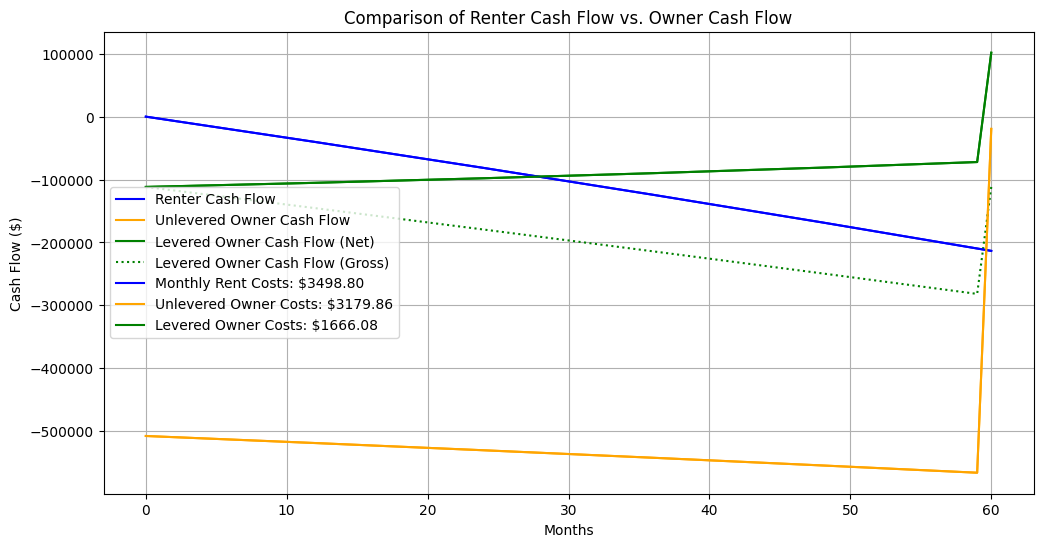

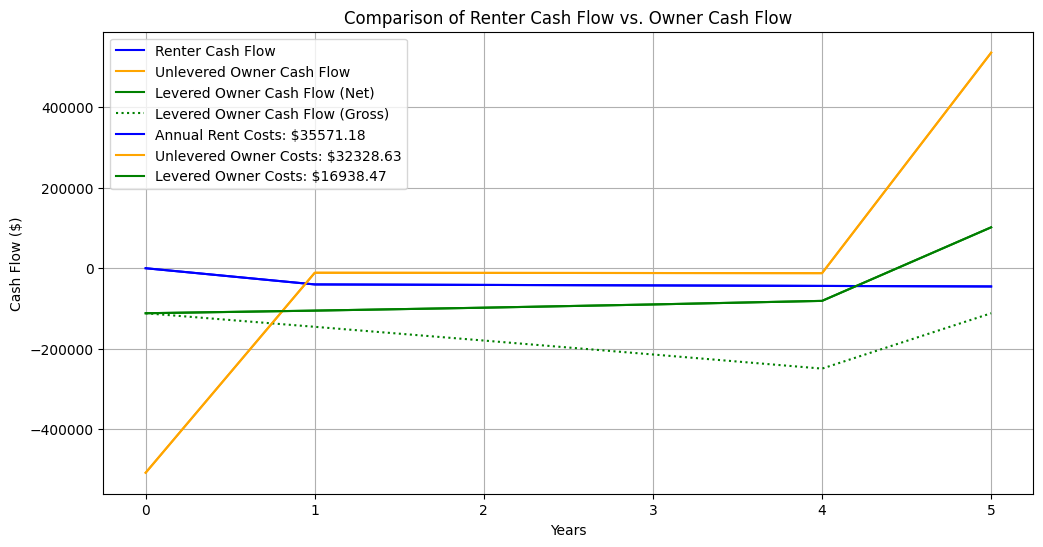

Years                           0.0            1.0                 \
Months                           0              1              2    
Rent                            0.0   -3300.000000   -3300.000000   
Renter's Insurance              0.0     -50.000000     -50.000000   
Renter's Cash Flow              0.0   -3350.000000   -3350.000000   
Acquisition               -500000.0       0.000000       0.000000   
Acquisition Costs           -7750.0       0.000000       0.000000   
Sale                            0.0       0.000000       0.000000   
Disposition Costs               0.0       0.000000       0.000000   
Property Tax                    0.0    -250.000000    -250.000000   
Property Tax Shield             0.0      87.500000      87.500000   
Insurance                       0.0    -250.000000    -250.000000   
Maintenance                     0.0    -416.666667    -416.666667   
Condo Dues                      0.0    -104.166667    -104.166667   
Unlevered Owner Cash Flow -507750.0    -933.333333    -933.333333   
Unlevered Net Cash Flow   -507750.0    2416.666667    2416.666667   
Loan Proceeds              400000.0       0.000000       0.000000   
Loan Repayment                  0.0       0.000000       0.000000   
Amortization                    0.0    -352.880117    -354.938584   
Loan Points                 -4000.0       0.000000       0.000000   
Interest                        0.0   -2333.333333   -2331.274867   
Interest Tax Shield             0.0     816.666667     815.946203   
Mortgage Insurance              0.0      -0.000000      -0.000000   
Levered Owner Cash Flow   -111750.0   -2802.880117   -2803.600580   
Levered Net Cash Flow     -111750.0     547.119883     546.399420   
Cum. Gross Equity         -111750.0 -114552.880117 -117356.480697   
Cum. Net Equity           -111750.0 -111202.880117 -110656.480697   

Years                                                                   \
Months                                3              4              5    
Rent                        -3300.000000   -3300.000000   -3300.000000   
Renter's Insurance            -50.000000     -50.000000     -50.000000   
Renter's Cash Flow          -3350.000000   -3350.000000   -3350.000000   
Acquisition                     0.000000       0.000000       0.000000   
Acquisition Costs               0.000000       0.000000       0.000000   
Sale                            0.000000       0.000000       0.000000   
Disposition Costs               0.000000       0.000000       0.000000   
Property Tax                 -250.000000    -250.000000    -250.000000   
Property Tax Shield            87.500000      87.500000      87.500000   
Insurance                    -250.000000    -250.000000    -250.000000   
Maintenance                  -416.666667    -416.666667    -416.666667   
Condo Dues                   -104.166667    -104.166667    -104.166667   
Unlevered Owner Cash Flow    -933.333333    -933.333333    -933.333333   
Unlevered Net Cash Flow      2416.666667    2416.666667    2416.666667   
Loan Proceeds                   0.000000       0.000000       0.000000   
Loan Repayment                  0.000000       0.000000       0.000000   
Amortization                 -357.009067    -359.091625    -361.186317   
Loan Points                     0.000000       0.000000       0.000000   
Interest                    -2329.204383   -2327.121825   -2325.027133   
Interest Tax Shield           815.221534     814.492639     813.759497   
Mortgage Insurance             -0.000000      -0.000000      -0.000000   
Levered Owner Cash Flow     -2804.325250   -2805.054145   -2805.787287   
Levered Net Cash Flow         545.674750     544.945855     544.212713   
Cum. Gross Equity         -120160.805947 -122965.860092 -125771.647379   
Cum. Net Equity           -110110.805947 -109565.860092 -109021.647379   

Years                                                                   \
Months                                6              7         

Years,0,1,2,3,4,5
Months,0,12,24,36,48,60
Rent,0.0,-39600.000000,-40788.000000,-42011.640000,-43272.000000,-44570.160000
Renter's Insurance,0.0,-600.000000,-618.000000,-636.480000,-655.560000,-675.240000
Renter's Cash Flow,0.0,-40200.000000,-41406.000000,-42648.120000,-43927.560000,-45245.400000
Acquisition,-500000.0,0.000000,0.000000,0.000000,0.000000,0.000000
Acquisition Costs,-7750.0,0.000000,0.000000,0.000000,0.000000,0.000000
Sale,0.0,0.000000,0.000000,0.000000,0.000000,579637.037150
Disposition Costs,0.0,0.000000,0.000000,0.000000,0.000000,-31880.037043
Property Tax,0.0,-3000.000000,-3090.000000,-3182.700000,-3278.181000,-3376.526430
Property Tax Shield,0.0,1050.000000,1081.500000,1113.945000,1147.363350,1181.784251


In [192]:
CF = CashFlow(test_query)
CF.__str__("mcf")
CF.__str__("acf")
CF.__plot__("mcf")
CF.__plot__("acf")
display(CF.__df__("mcf",transpose=True))
display(CF.__df__("acf",transpose=True))